## CArga del CSV

In [1]:
import pandas as pd
import geopandas as gpd

In [3]:
FF21_mather = gpd.read_file(r"E:\inSAR_GZ\shapes\FF21_keldo.gpkg",layer='FF21_mather')

FeatureError: In GetNextRawFeature(): sqlite3_step() : database disk image is malformed

In [14]:
FF21_mather['AREA'] = FF21_mather['geometry'].area/10000

In [15]:
df_pure = pd.read_csv(r"E:\inSAR_GZ\stats_FF21_mather_pure_stats_40.csv")
### replace _1 for winter _2 for spring _3 for summer _4 for autumn
df_pure.columns = df_pure.columns.str.replace('_1', '_winter')
df_pure.columns = df_pure.columns.str.replace('_2', '_spring')
df_pure.columns = df_pure.columns.str.replace('_3', '_summer')
df_pure.columns = df_pure.columns.str.replace('_4', '_autumn')

In [16]:
median_colums = [c for c in df_pure.columns if 'MEDIAN' in c] + ['ID_STATS']
df_pure_median = df_pure[median_colums]
vc_columns = [c for c in df_pure.columns if 'VC' in c] + ['ID_STATS'] 
df_pure_vc = df_pure[vc_columns]


In [17]:
df_pure_median_merged = pd.merge(FF21_mather,df_pure_median,left_on='ID_STATS',right_on='ID_STATS',how='outer')
# print(df_pure_median_merged.columns)
df_pure_median_merged = df_pure_median_merged[['ID_STATS','ID_FORARB','AREA','MEDIAN_winter','MEDIAN_spring','MEDIAN_summer','MEDIAN_autumn']].dropna()
df_pure_vc_merged = pd.merge(FF21_mather,df_pure_vc,left_on='ID_STATS',right_on='ID_STATS',how='outer')
# print(df_pure_vc_merged.columns)
df_pure_vc_merged = df_pure_vc_merged[['ID_STATS','ID_FORARB','AREA','VC_winter','VC_spring','VC_summer','VC_autumn']].dropna()

In [18]:
df_pure_median_merged.to_csv(r"E:\inSAR_GZ\stats_FF21_mather_pure_stats_40_median.csv",index=False)
df_pure_vc_merged.to_csv(r"E:\inSAR_GZ\stats_FF21_mather_pure_stats_40_vc.csv",index=False)
print('done')

done


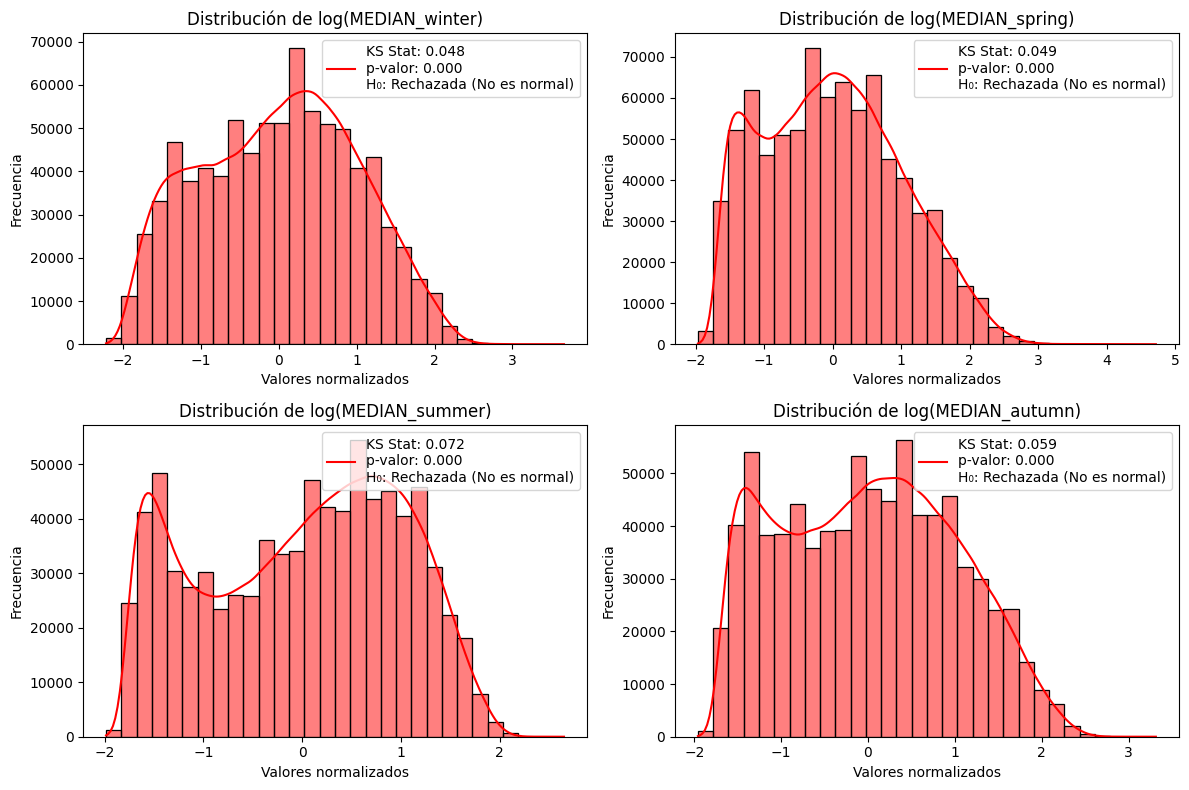

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, norm
# Simulación de un DataFrame de ejemplo (elimina esta parte si ya tienes `df_pure`)
stations = ['winter', 'spring', 'summer', 'autumn']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Subplots en 2x2
axes = axes.flatten()  # Para iterar fácilmente

alpha = 0.1  # Nivel de significancia

for i, season in enumerate(stations):
    # Filtrado y transformación logarítmica
    df_pure_median = df_pure[[f'MEDIAN_{season}', 'ID_STATS']].dropna()
    df_pure_median = df_pure_median[df_pure_median[f'MEDIAN_{season}'] > 0]  # Evitar log(0)
    
    # df_pure_median[f'log_median_{season}'] = np.log(df_pure_median[f'MEDIAN_{season}'])
    df_pure_median[f'log_median_{season}'] = (df_pure_median[f'MEDIAN_{season}'])
    
    # Normalizar los datos
    log_values = df_pure_median[f'log_median_{season}']
    standardized_values = (log_values - log_values.mean()) / log_values.std()
    
    # Prueba de Kolmogorov-Smirnov
    stat, p = kstest(standardized_values, 'norm')
    
    # Interpretación de la hipótesis nula
    if p > alpha:
        result = "Aceptada (Distribución normal)"
        color = 'green'
    else:
        result = "Rechazada (No es normal)"
        color = 'red'
    
    # Graficar histograma
    sns.histplot(standardized_values, kde=True, bins=30, ax=axes[i], color=color, edgecolor='black')
    axes[i].set_title(f'Distribución de log(MEDIAN_{season})', fontsize=12)
    axes[i].set_xlabel('Valores normalizados')
    axes[i].set_ylabel('Frecuencia')
    
    # Agregar leyenda con resultados de KS Test
    legend_text = (f'KS Stat: {stat:.3f}\n'
                   f'p-valor: {p:.3f}\n'
                   f'H₀: {result}')
    
    axes[i].legend([legend_text], loc='upper right', fontsize=10, frameon=True)

# Ajustar diseño
plt.tight_layout()
plt.show()


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, norm

stations = ['winter', 'spring', 'summer', 'autumn']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Subplots en 2x2
axes = axes.flatten()  # Para iterar fácilmente

alpha = 0.1  # Nivel de significancia

for i, season in enumerate(stations):
    # Filtrado y transformación logarítmica
    df_pure_vc = df_pure[[f'VC_{season}', 'ID_STATS']].dropna()
    df_pure_vc = df_pure_vc[df_pure_vc[f'VC_{season}'] > 0]  # Evitar log(0)
    
    df_pure_vc[f'log_VC_{season}'] = (df_pure_vc[f'VC_{season}'])
    # df_pure_vc[f'log_VC_{season}'] = np.log(df_pure_vc[f'VC_{season}'])
    
    # Normalizar los datos
    log_values = df_pure_vc[f'log_VC_{season}']
    standardized_values = (log_values - log_values.mean()) / log_values.std()
    
    # Prueba de Kolmogorov-Smirnov
    stat, p = kstest(standardized_values, 'norm')
    
    # Interpretación de la hipótesis nula
    if p > alpha:
        result = "Aceptada (Distribución normal)"
        color = 'green'
    else:
        result = "Rechazada (No es normal)"
        color = 'red'
    
    # Graficar histograma
    sns.histplot(standardized_values, kde=True, bins=30, ax=axes[i], color=color, edgecolor='black')
    axes[i].set_title(f'Distribución de log(VC_{season})', fontsize=12)
    axes[i].set_xlabel('Valores normalizados')
    axes[i].set_ylabel('Frecuencia')
    
    # Agregar leyenda con resultados de KS Test
    legend_text = (f'KS Stat: {stat:.3f}\n'
                   f'p-valor: {p:.3f}\n'
                   f'H₀: {result}')
    
    axes[i].legend([legend_text], loc='upper right', fontsize=10, frameon=True)

# Ajustar diseño
plt.tight_layout()
plt.show()


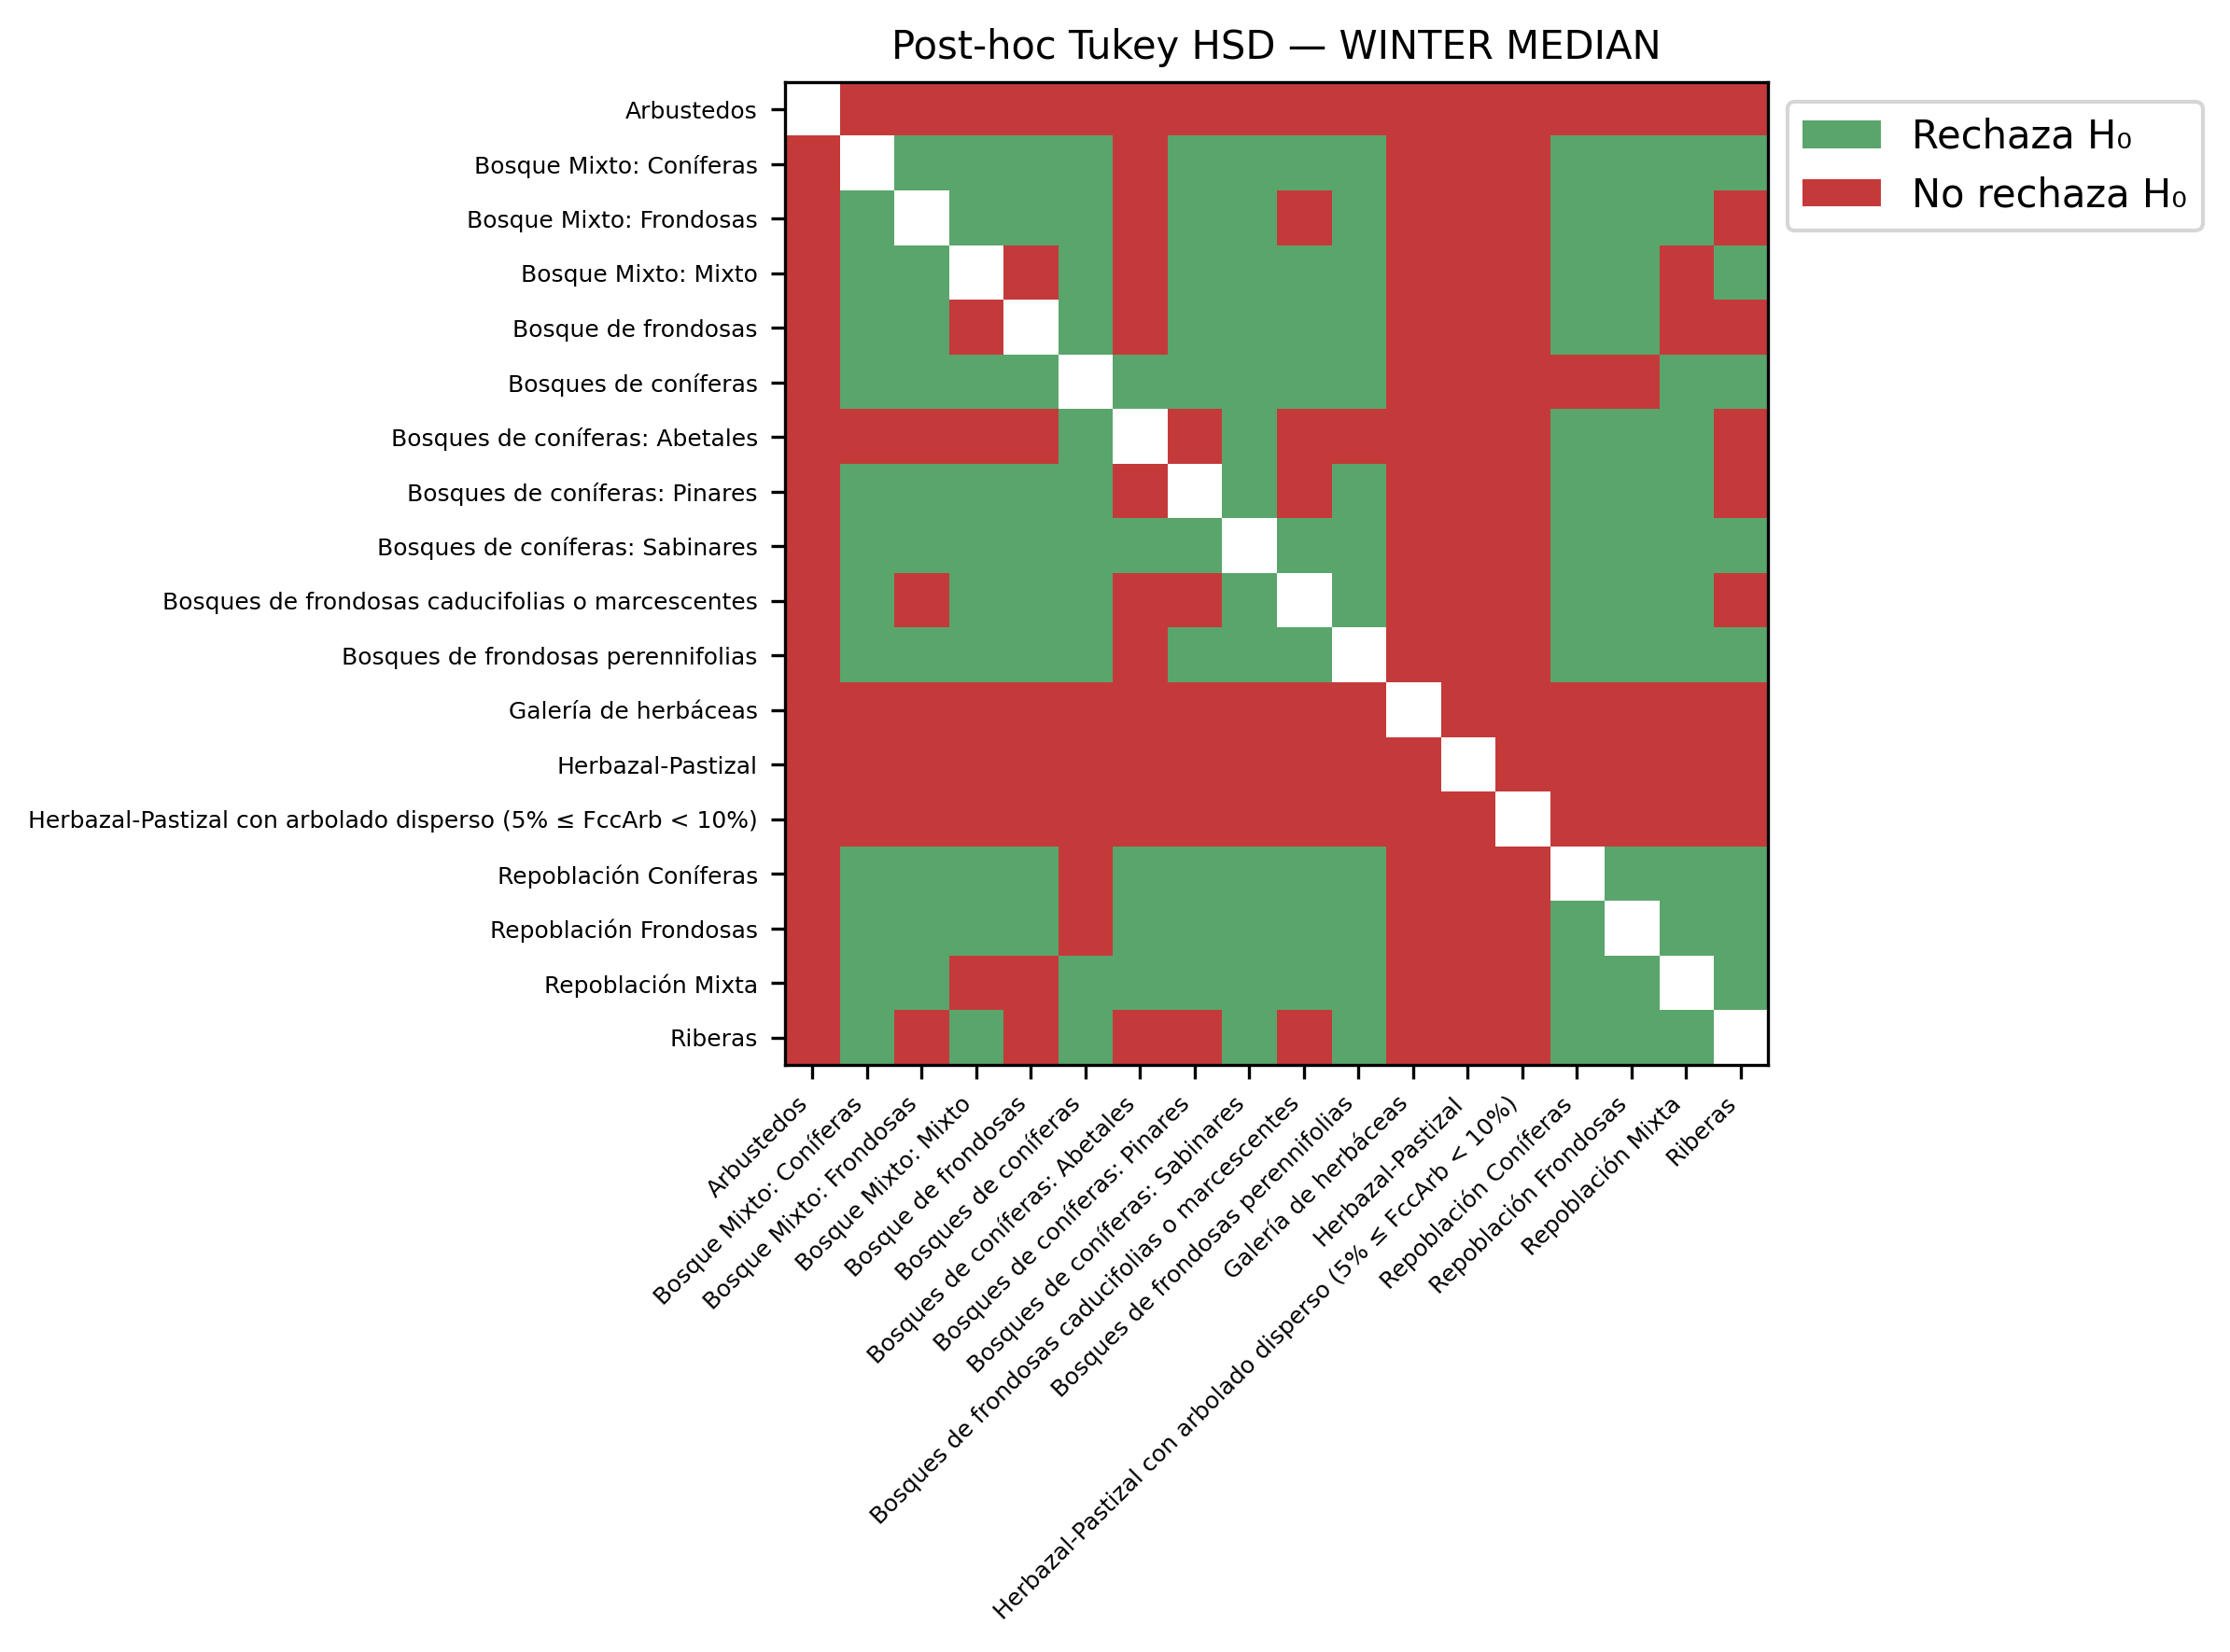

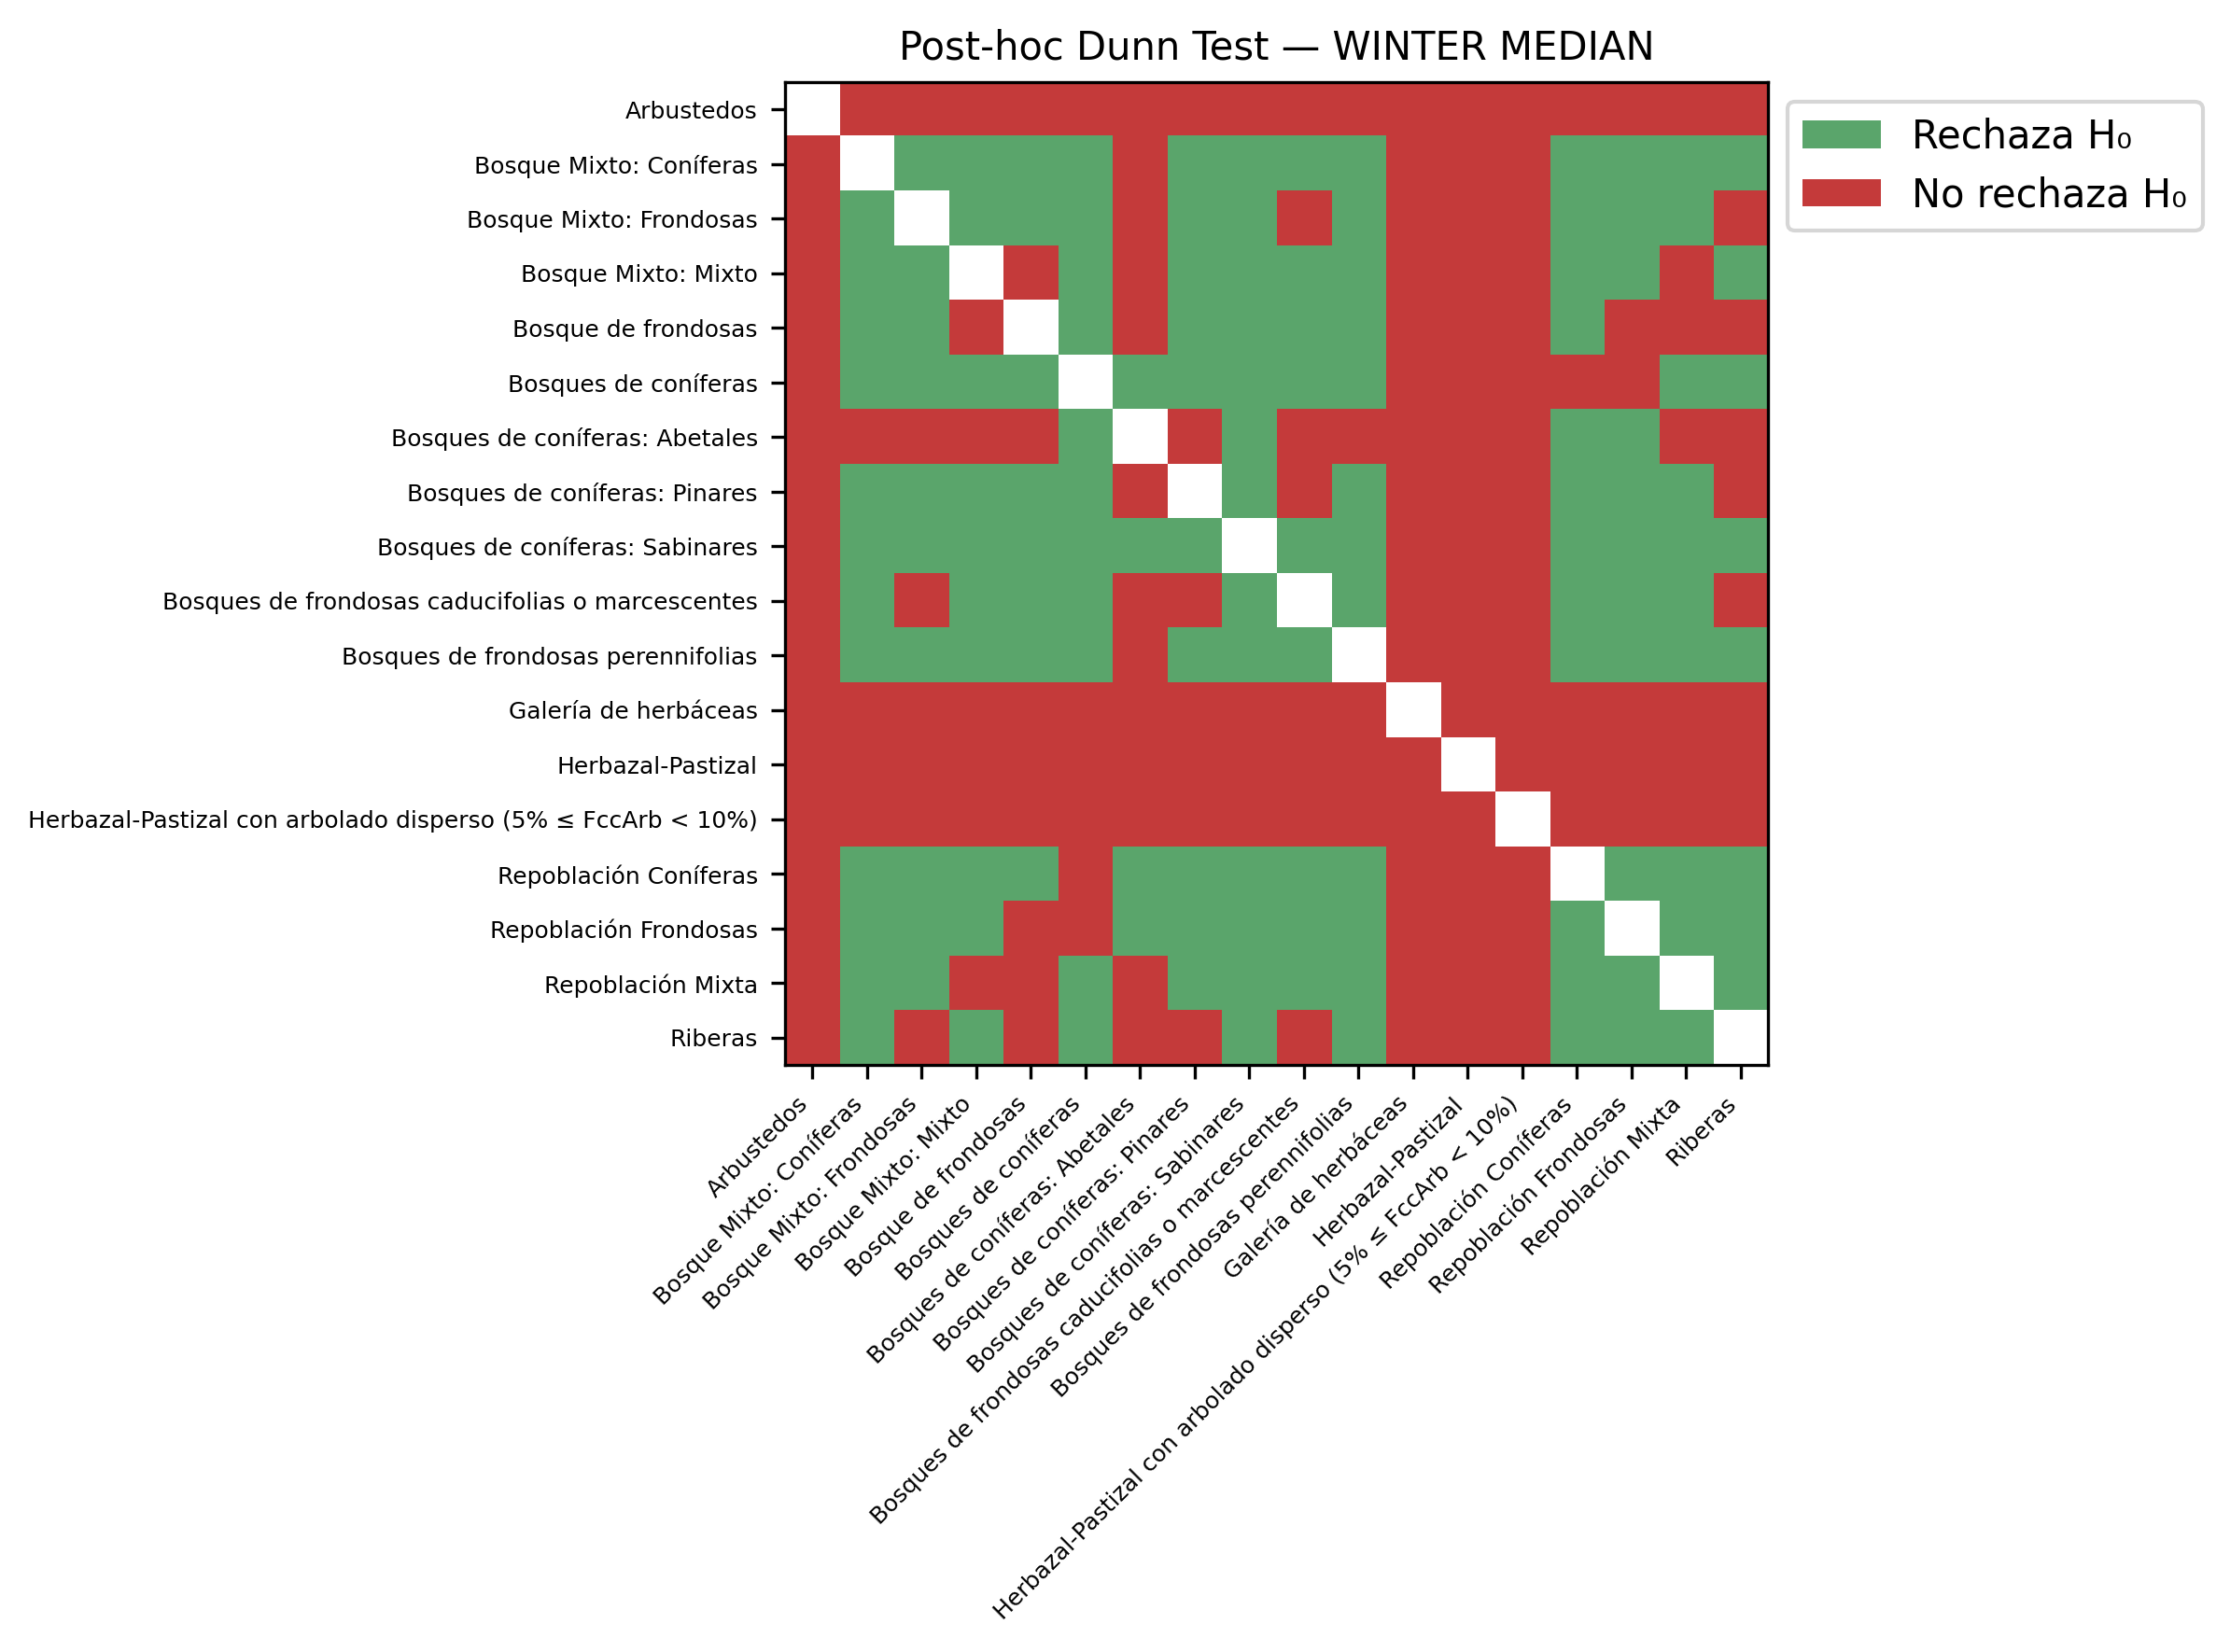

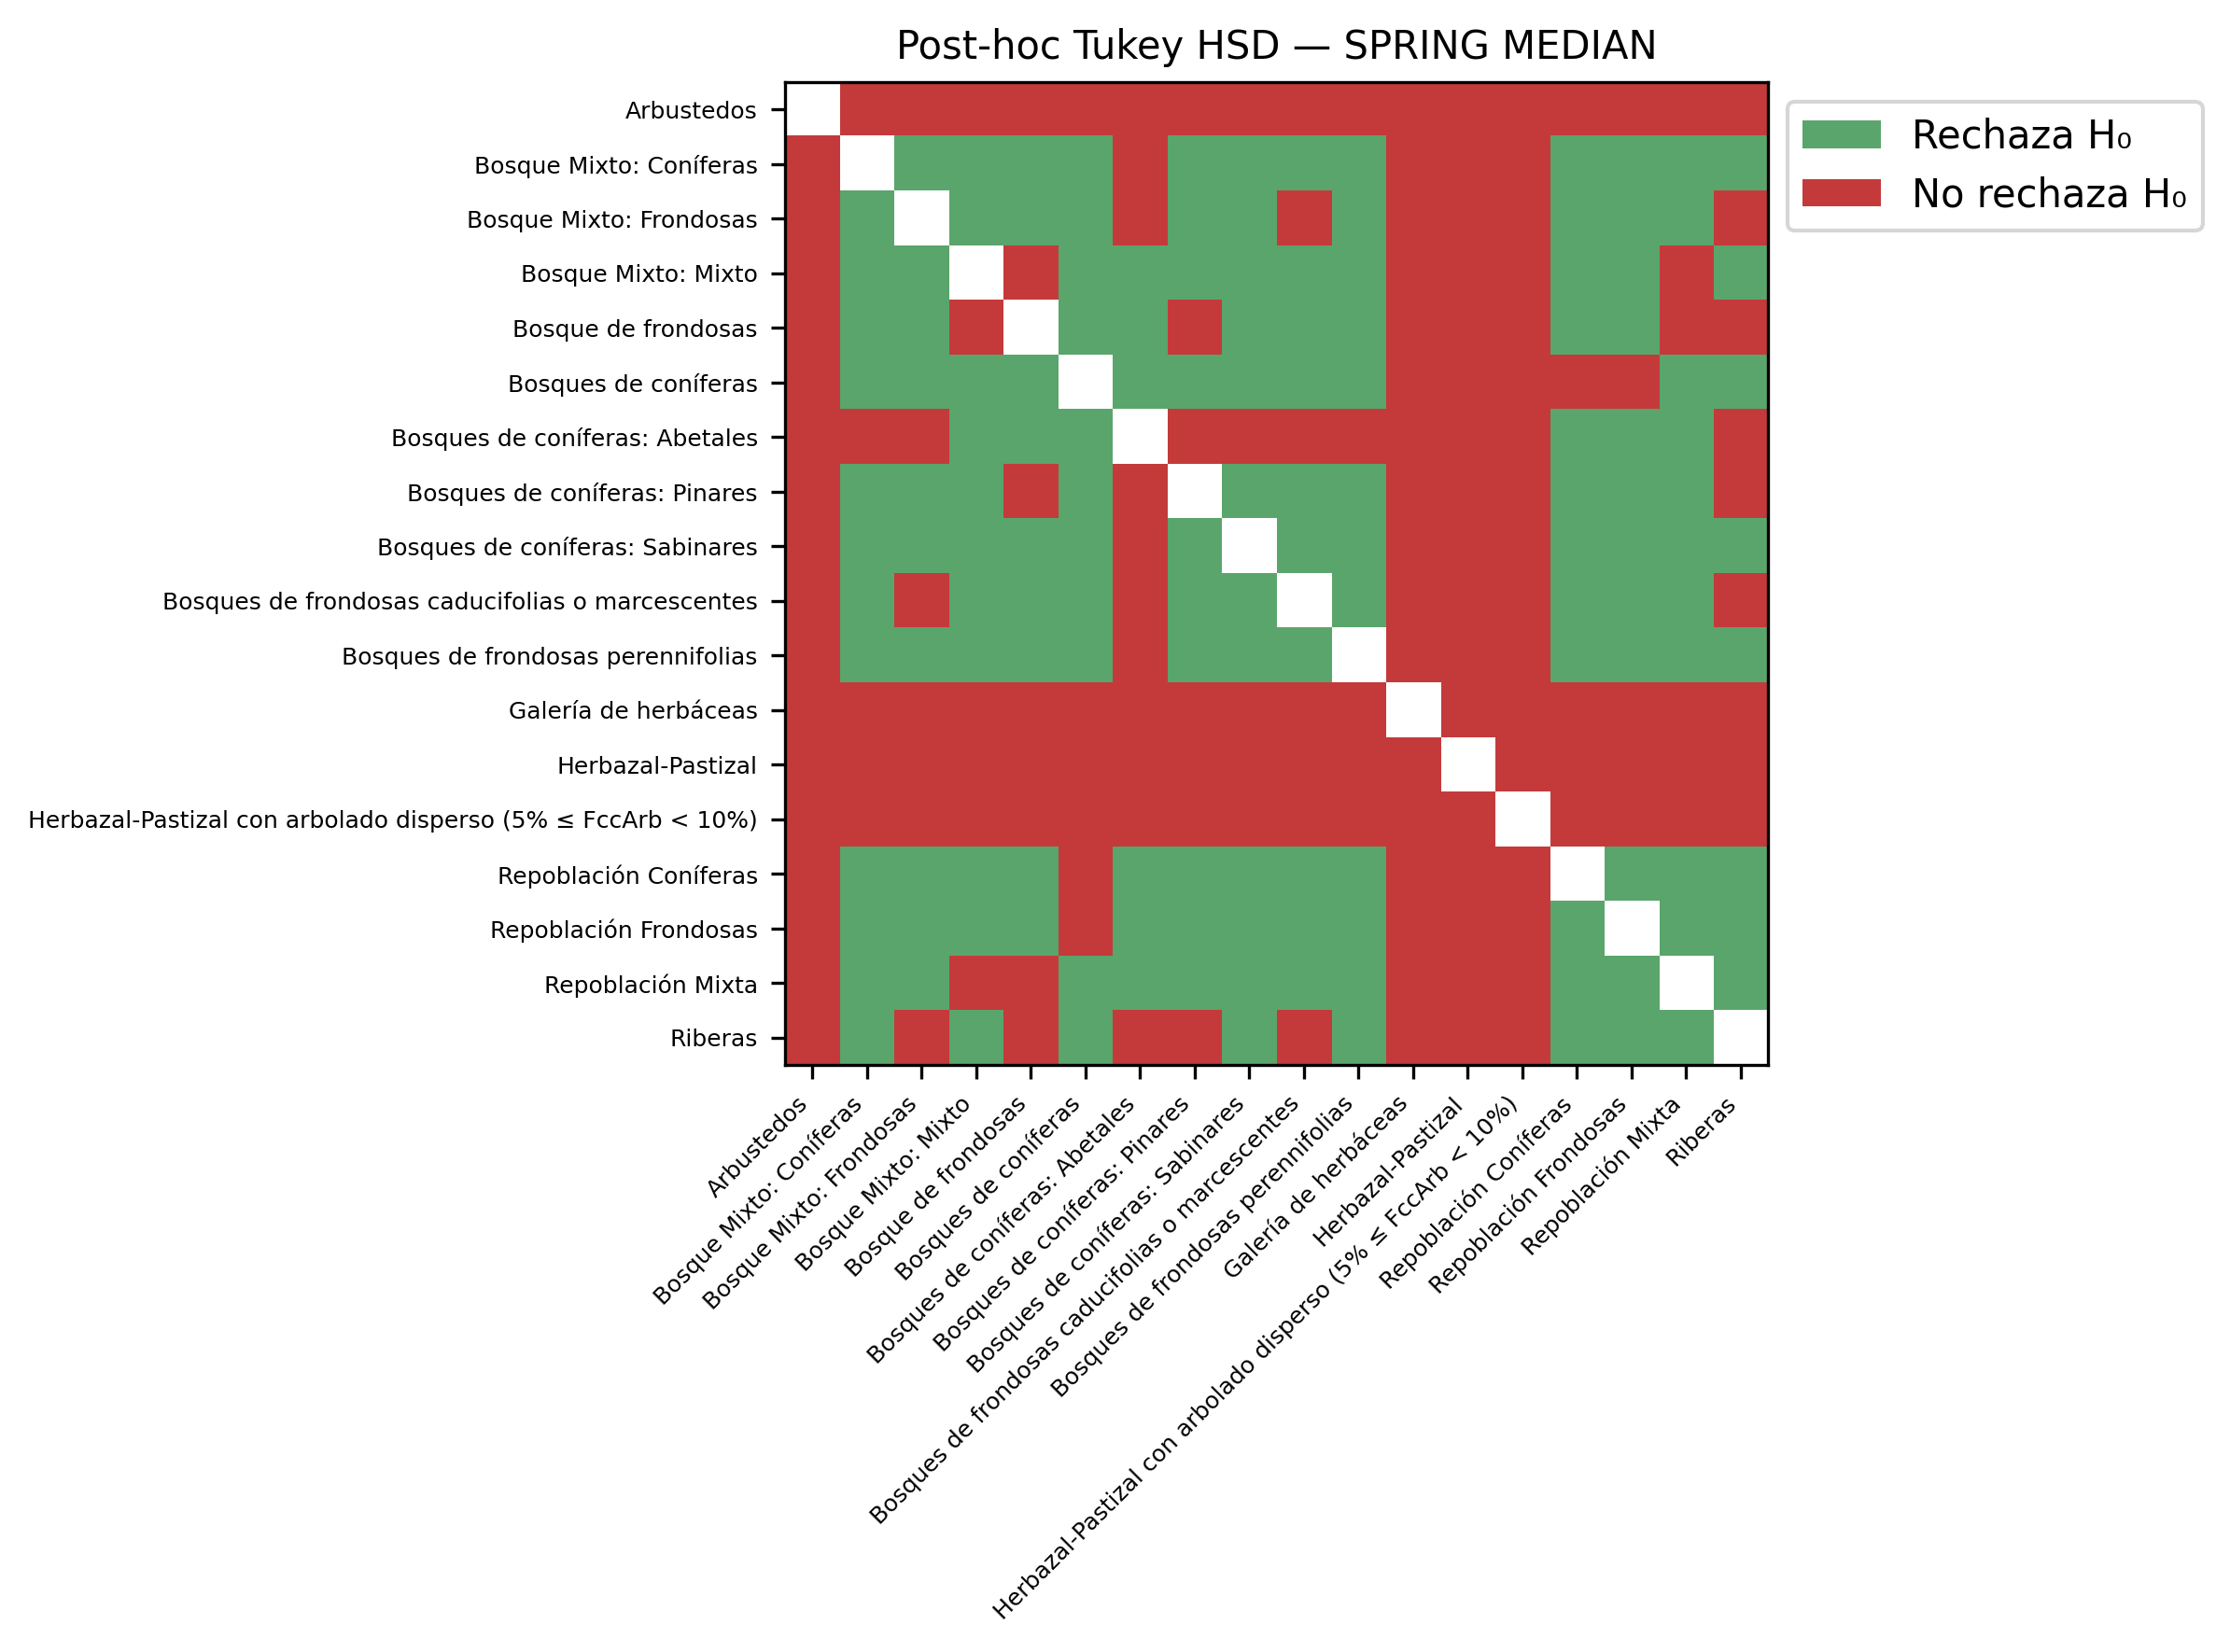

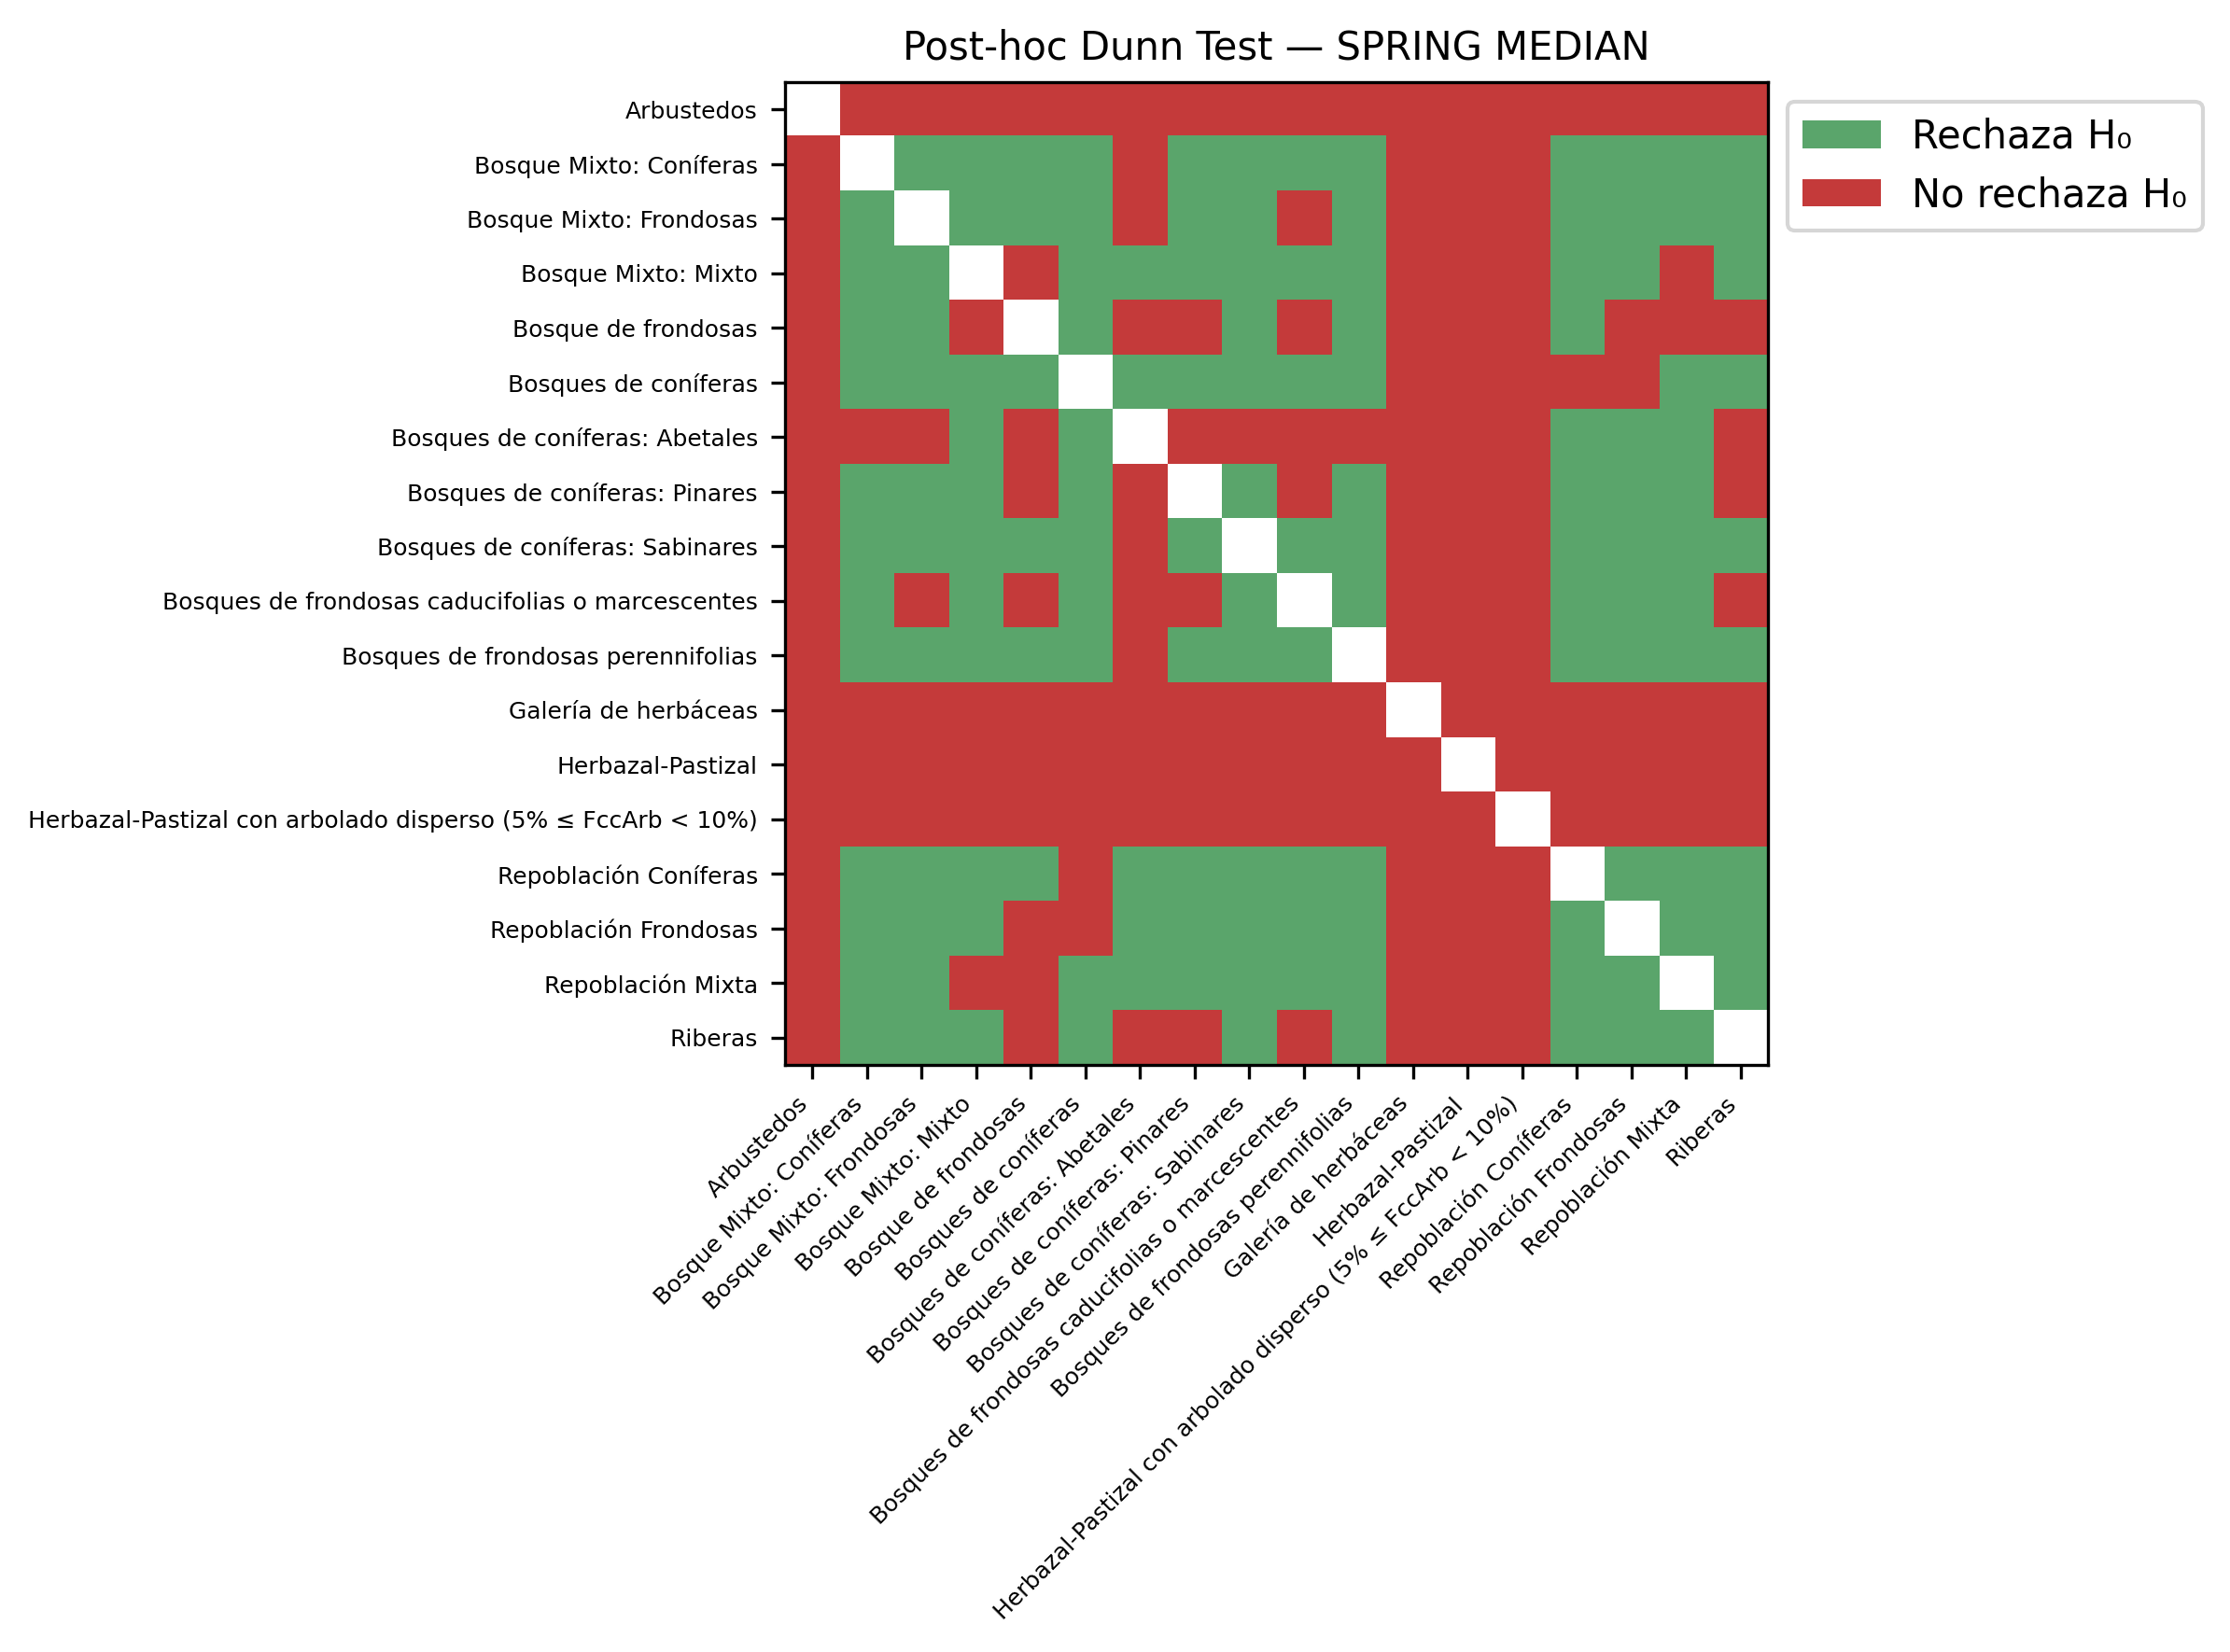

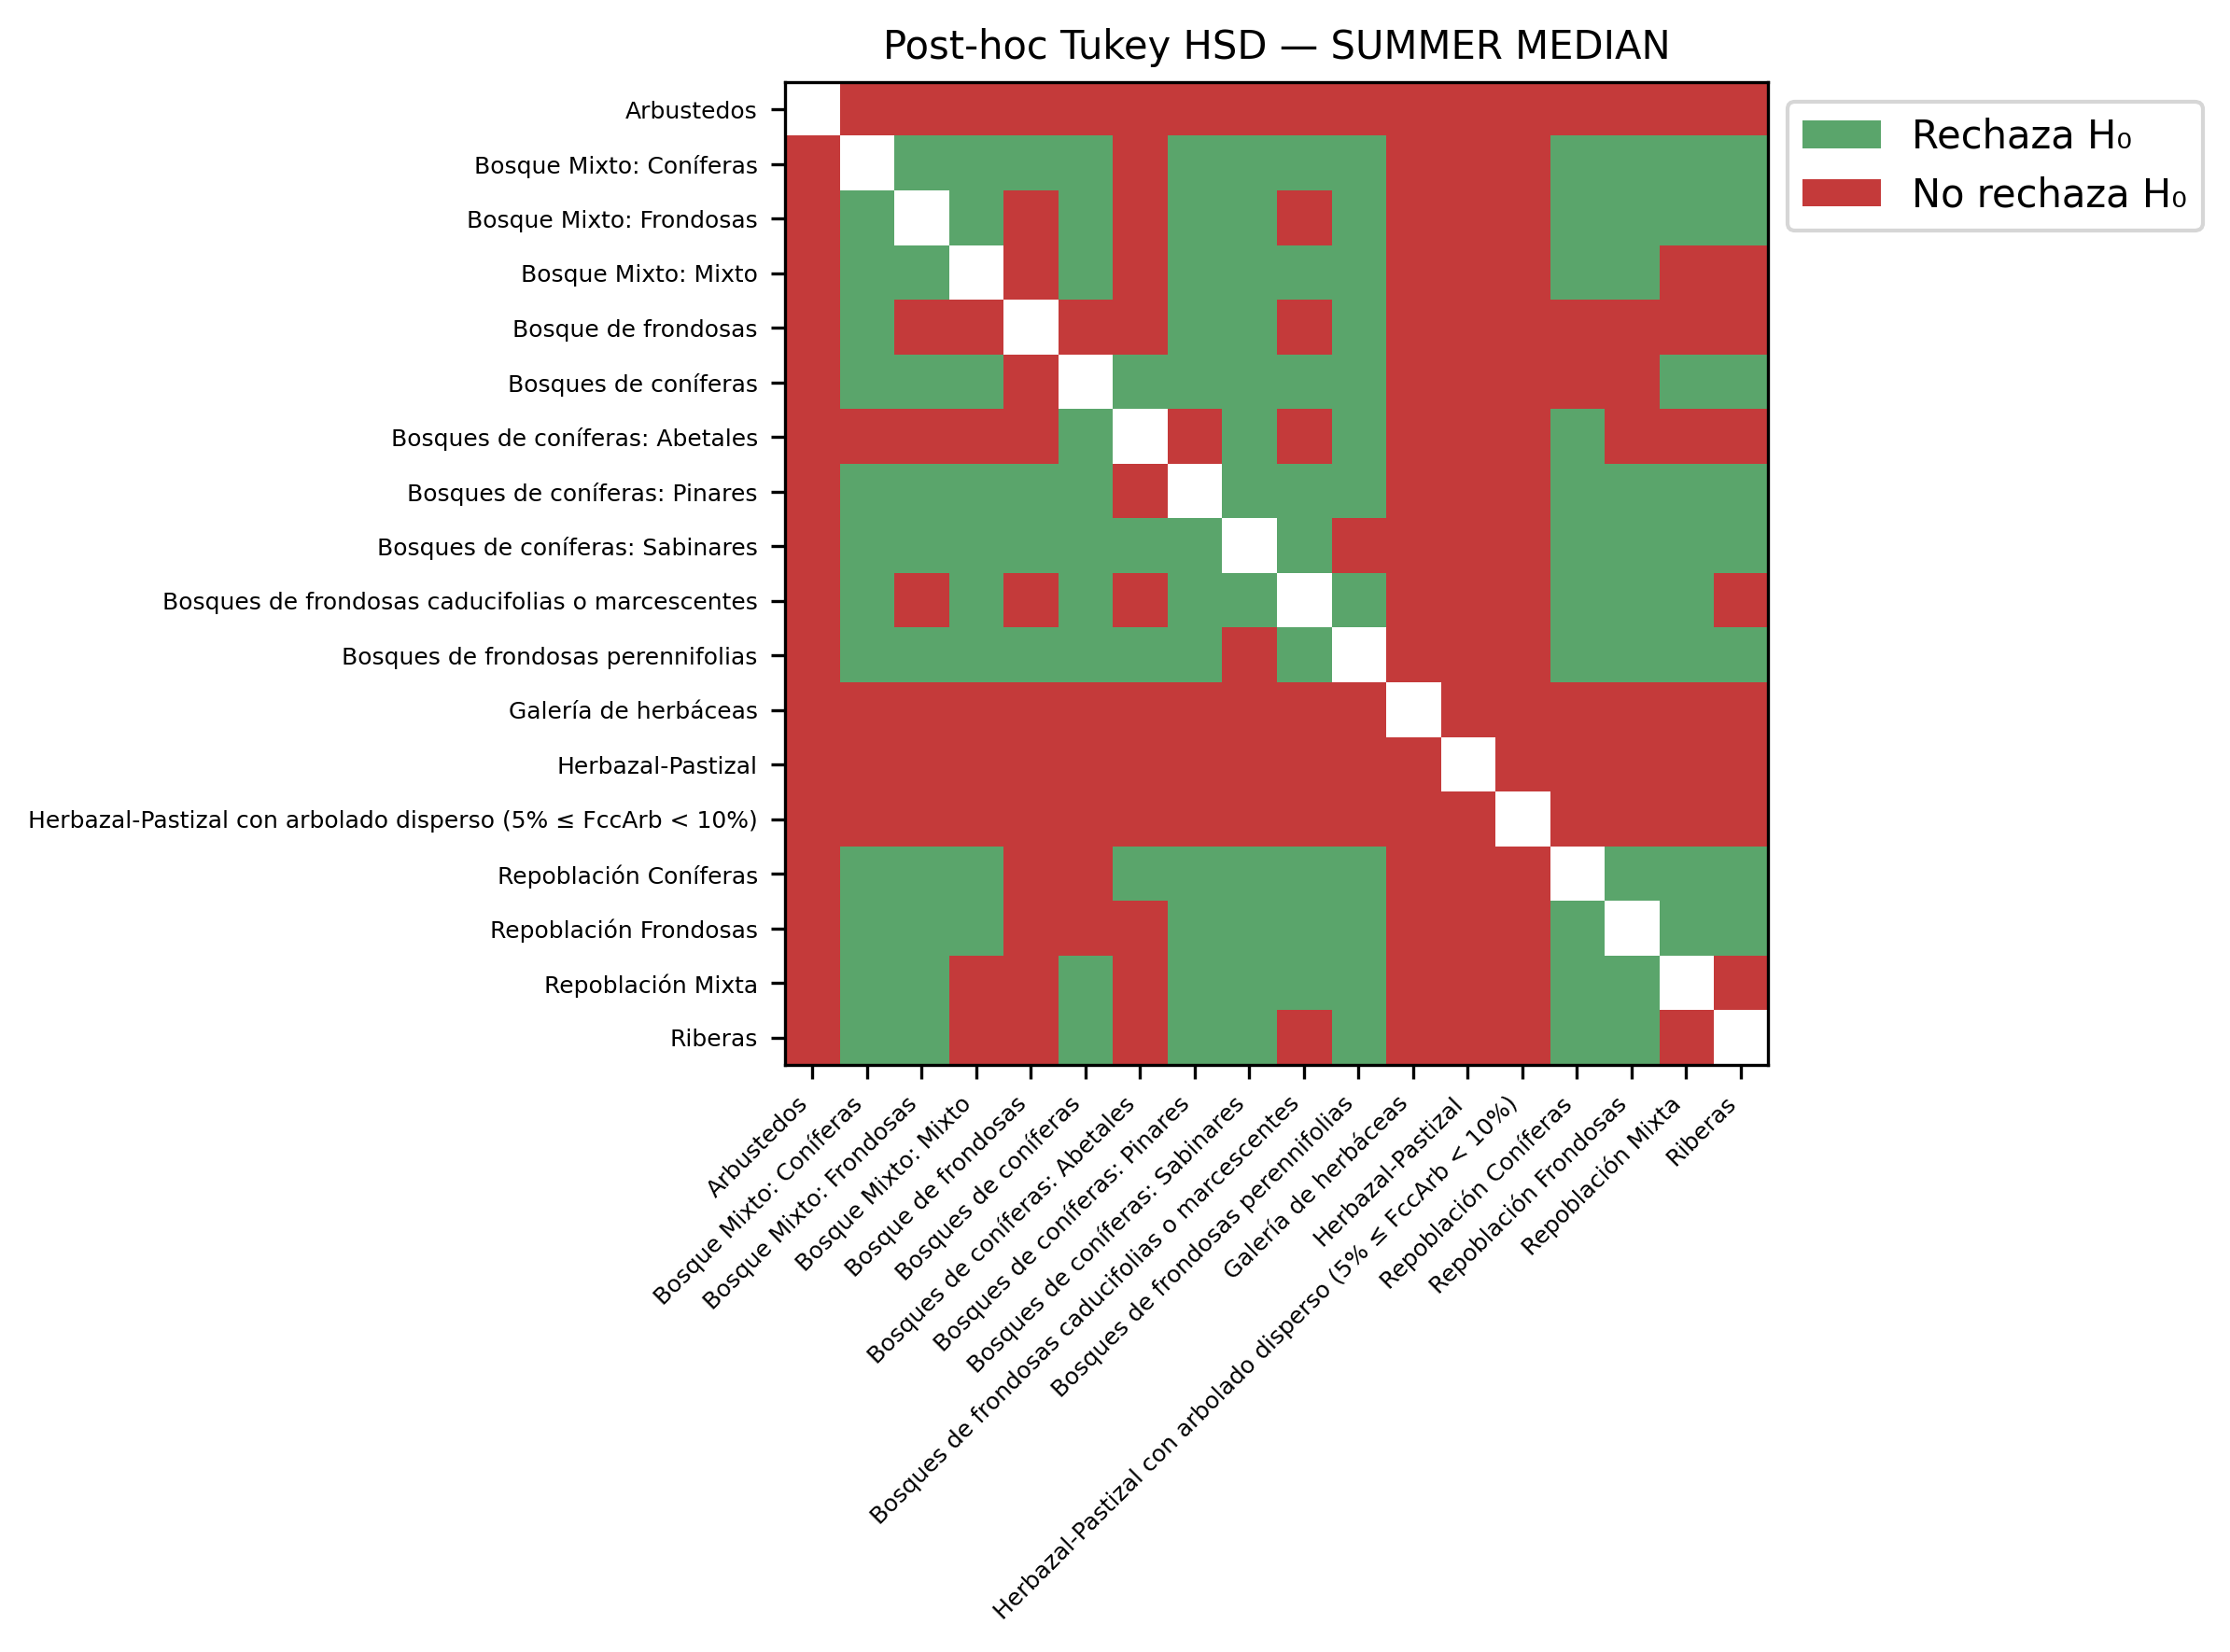

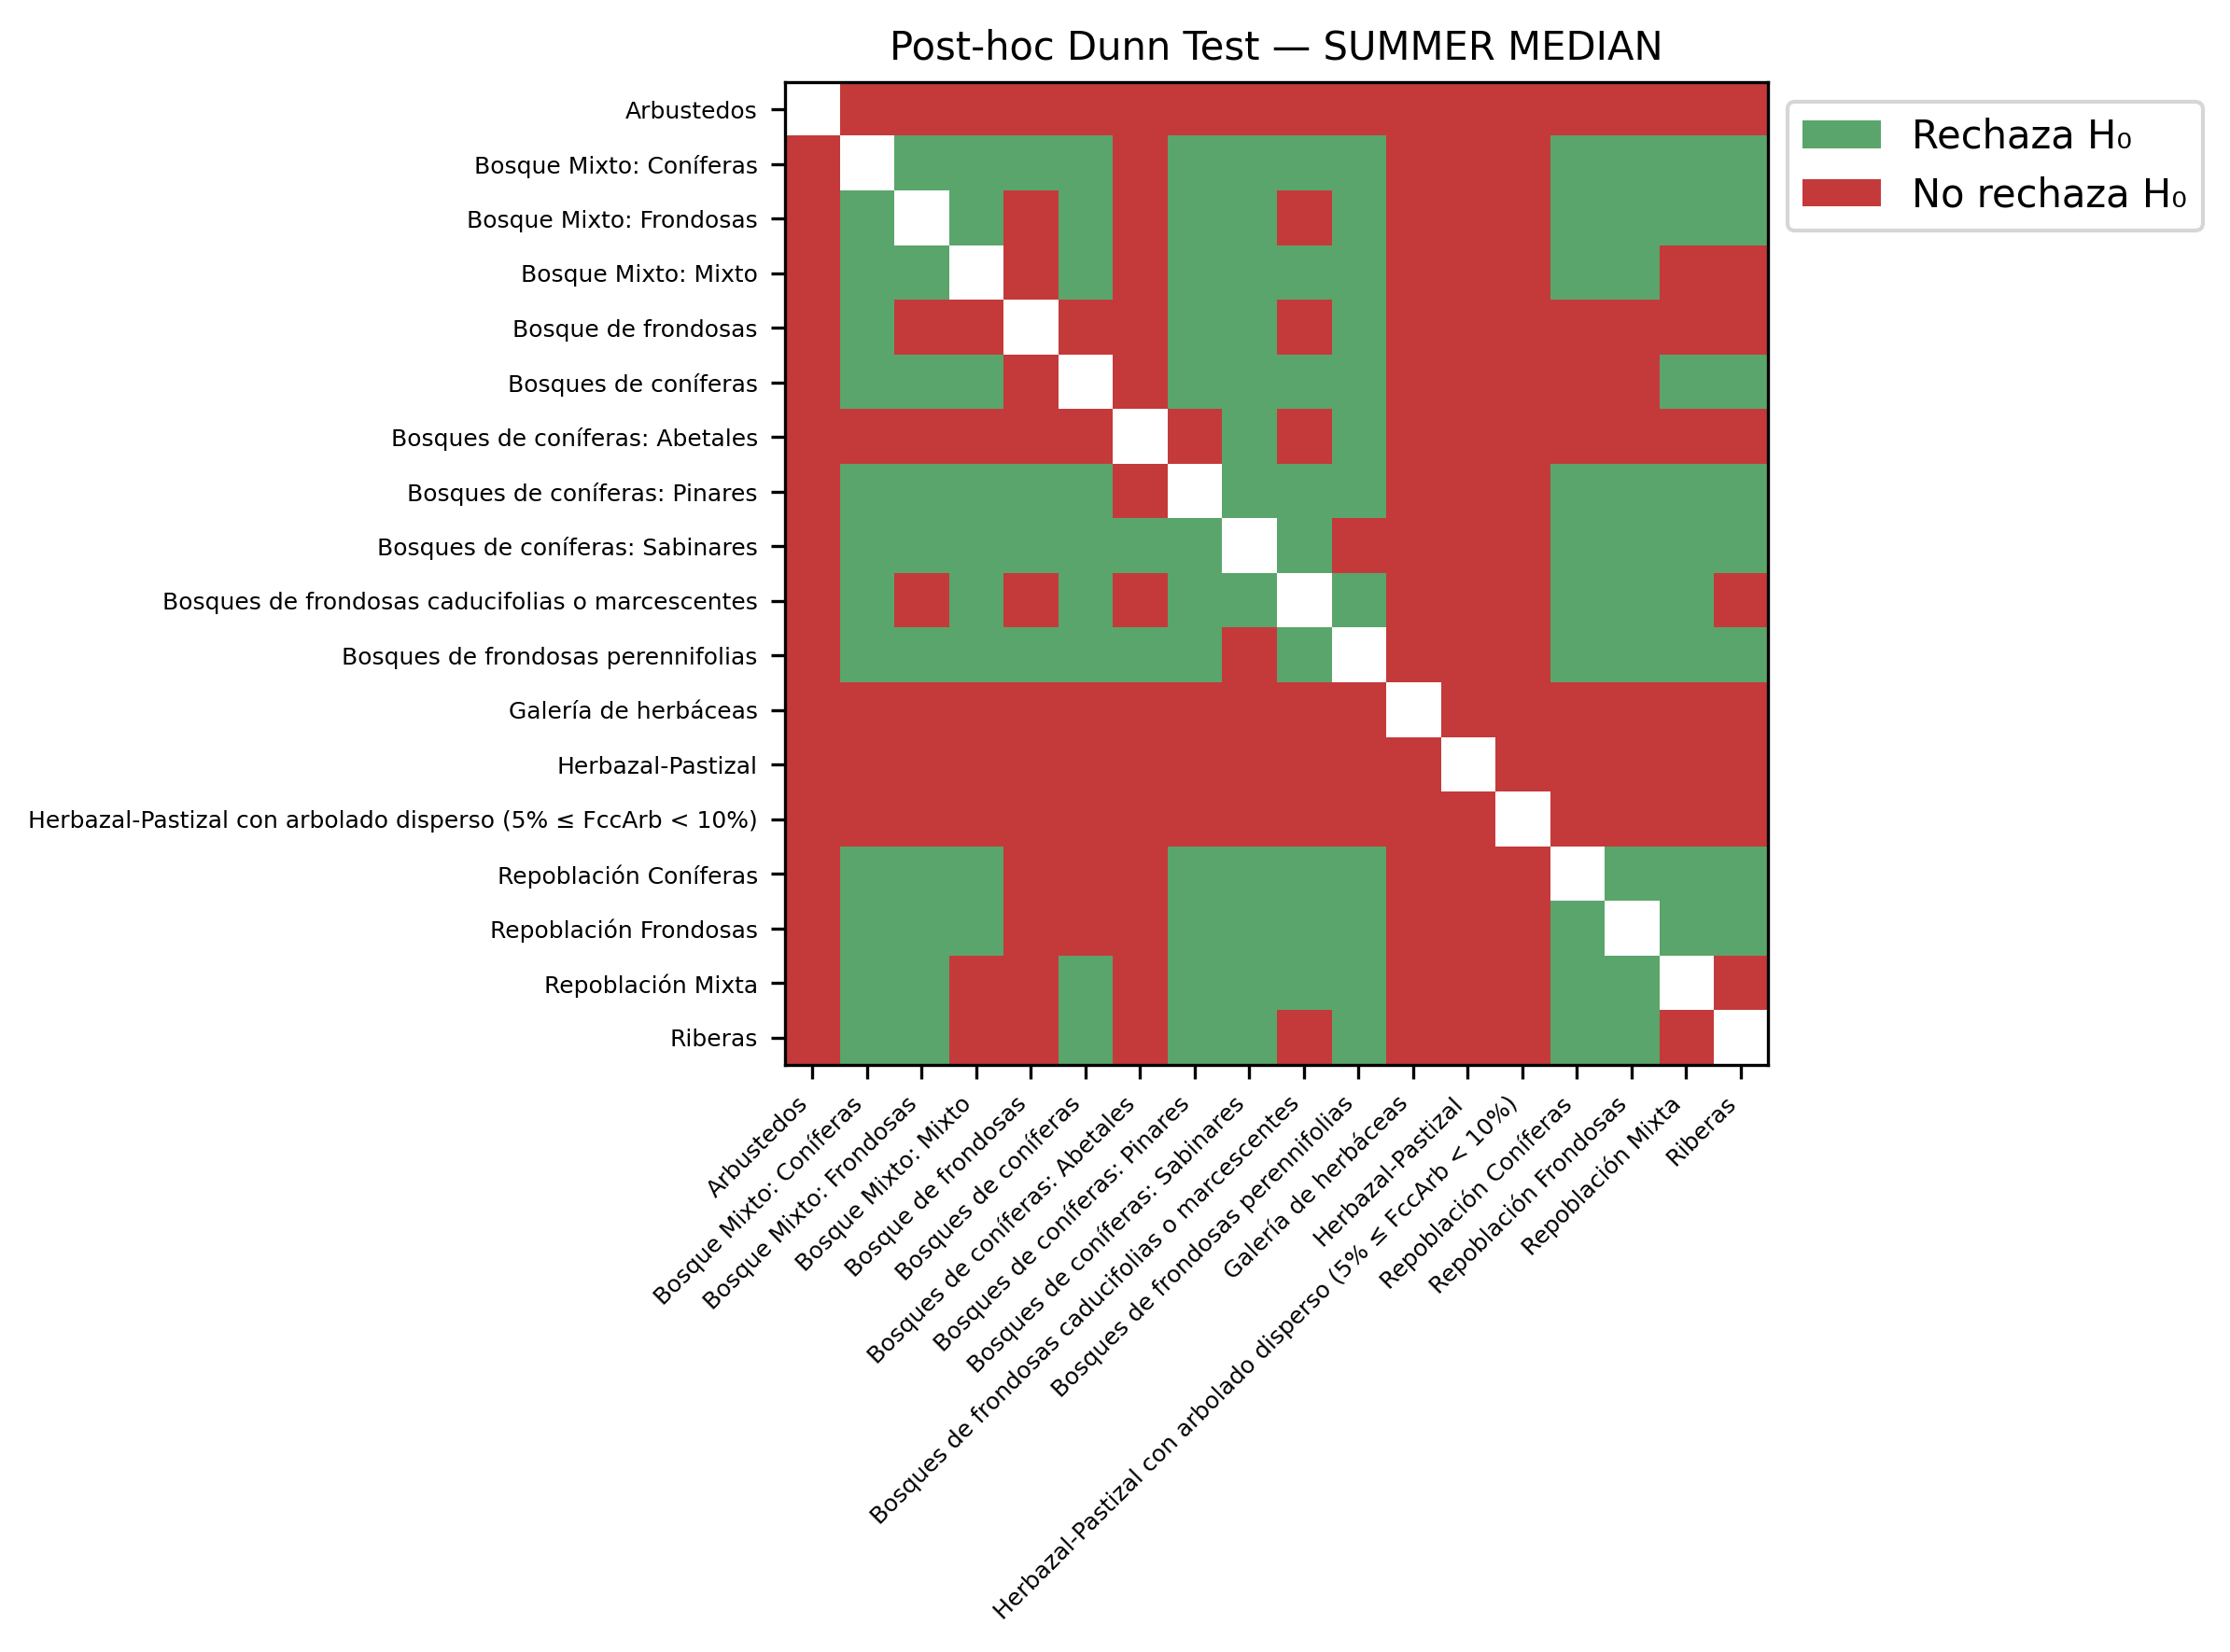

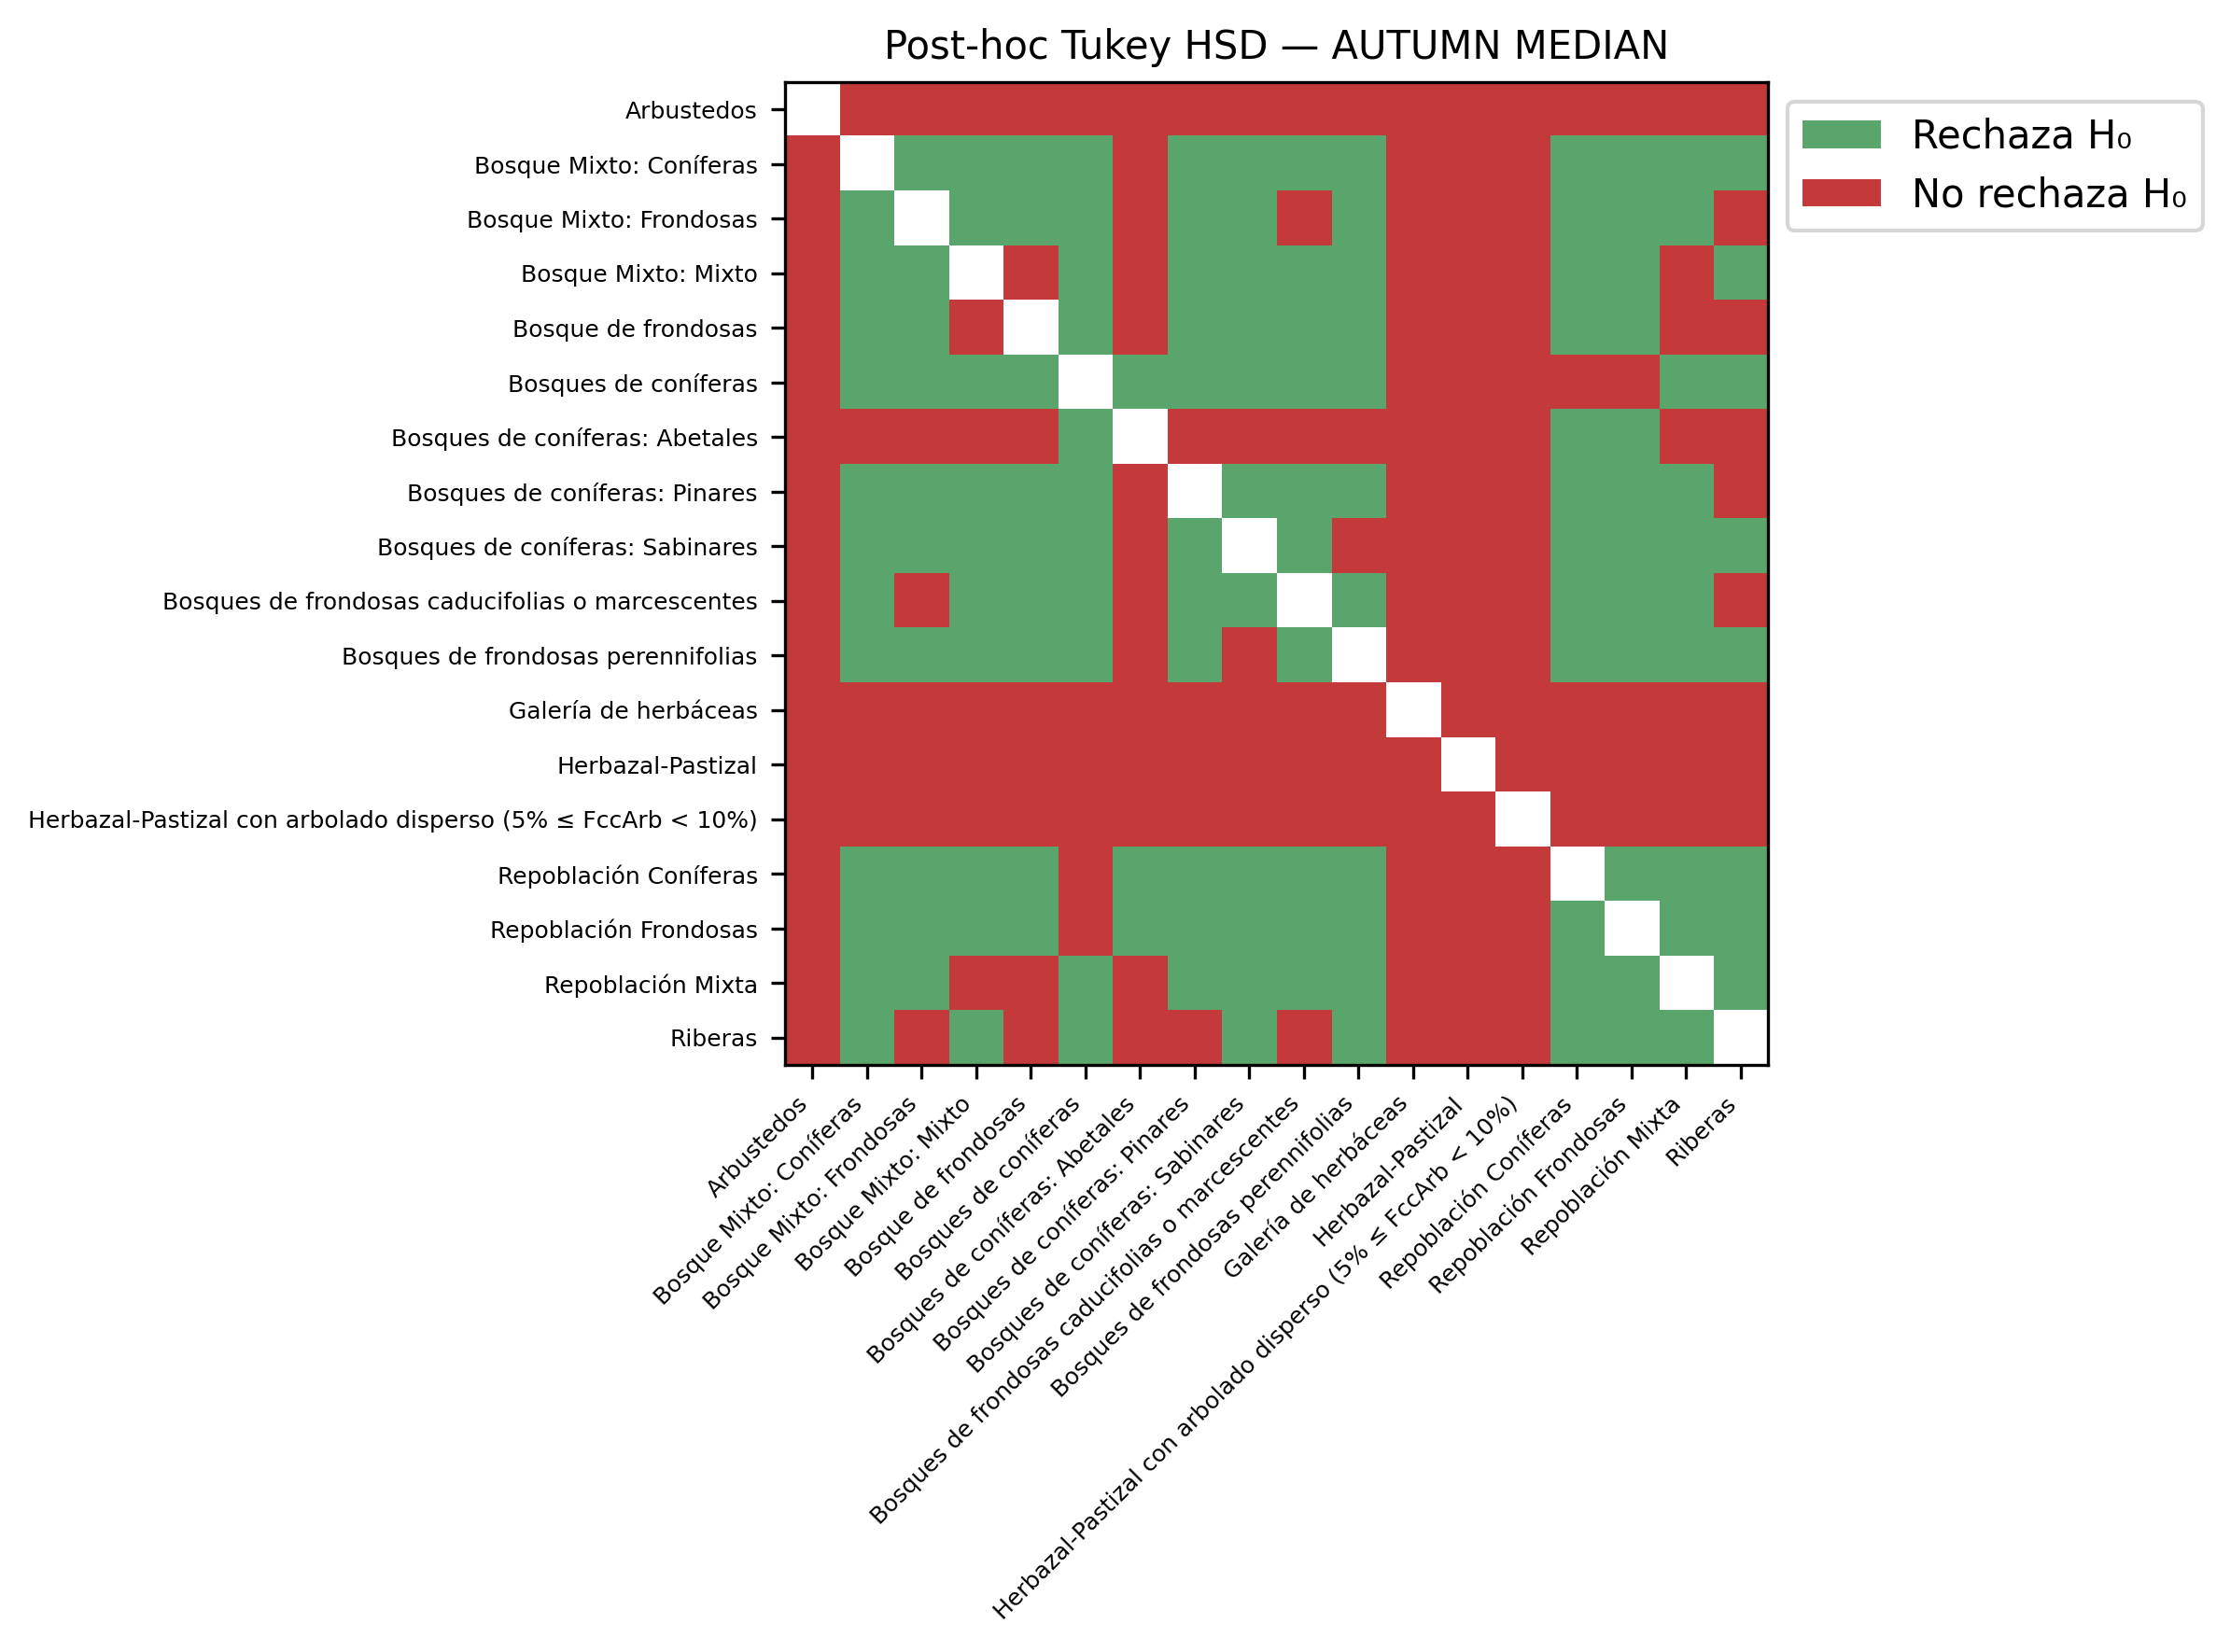

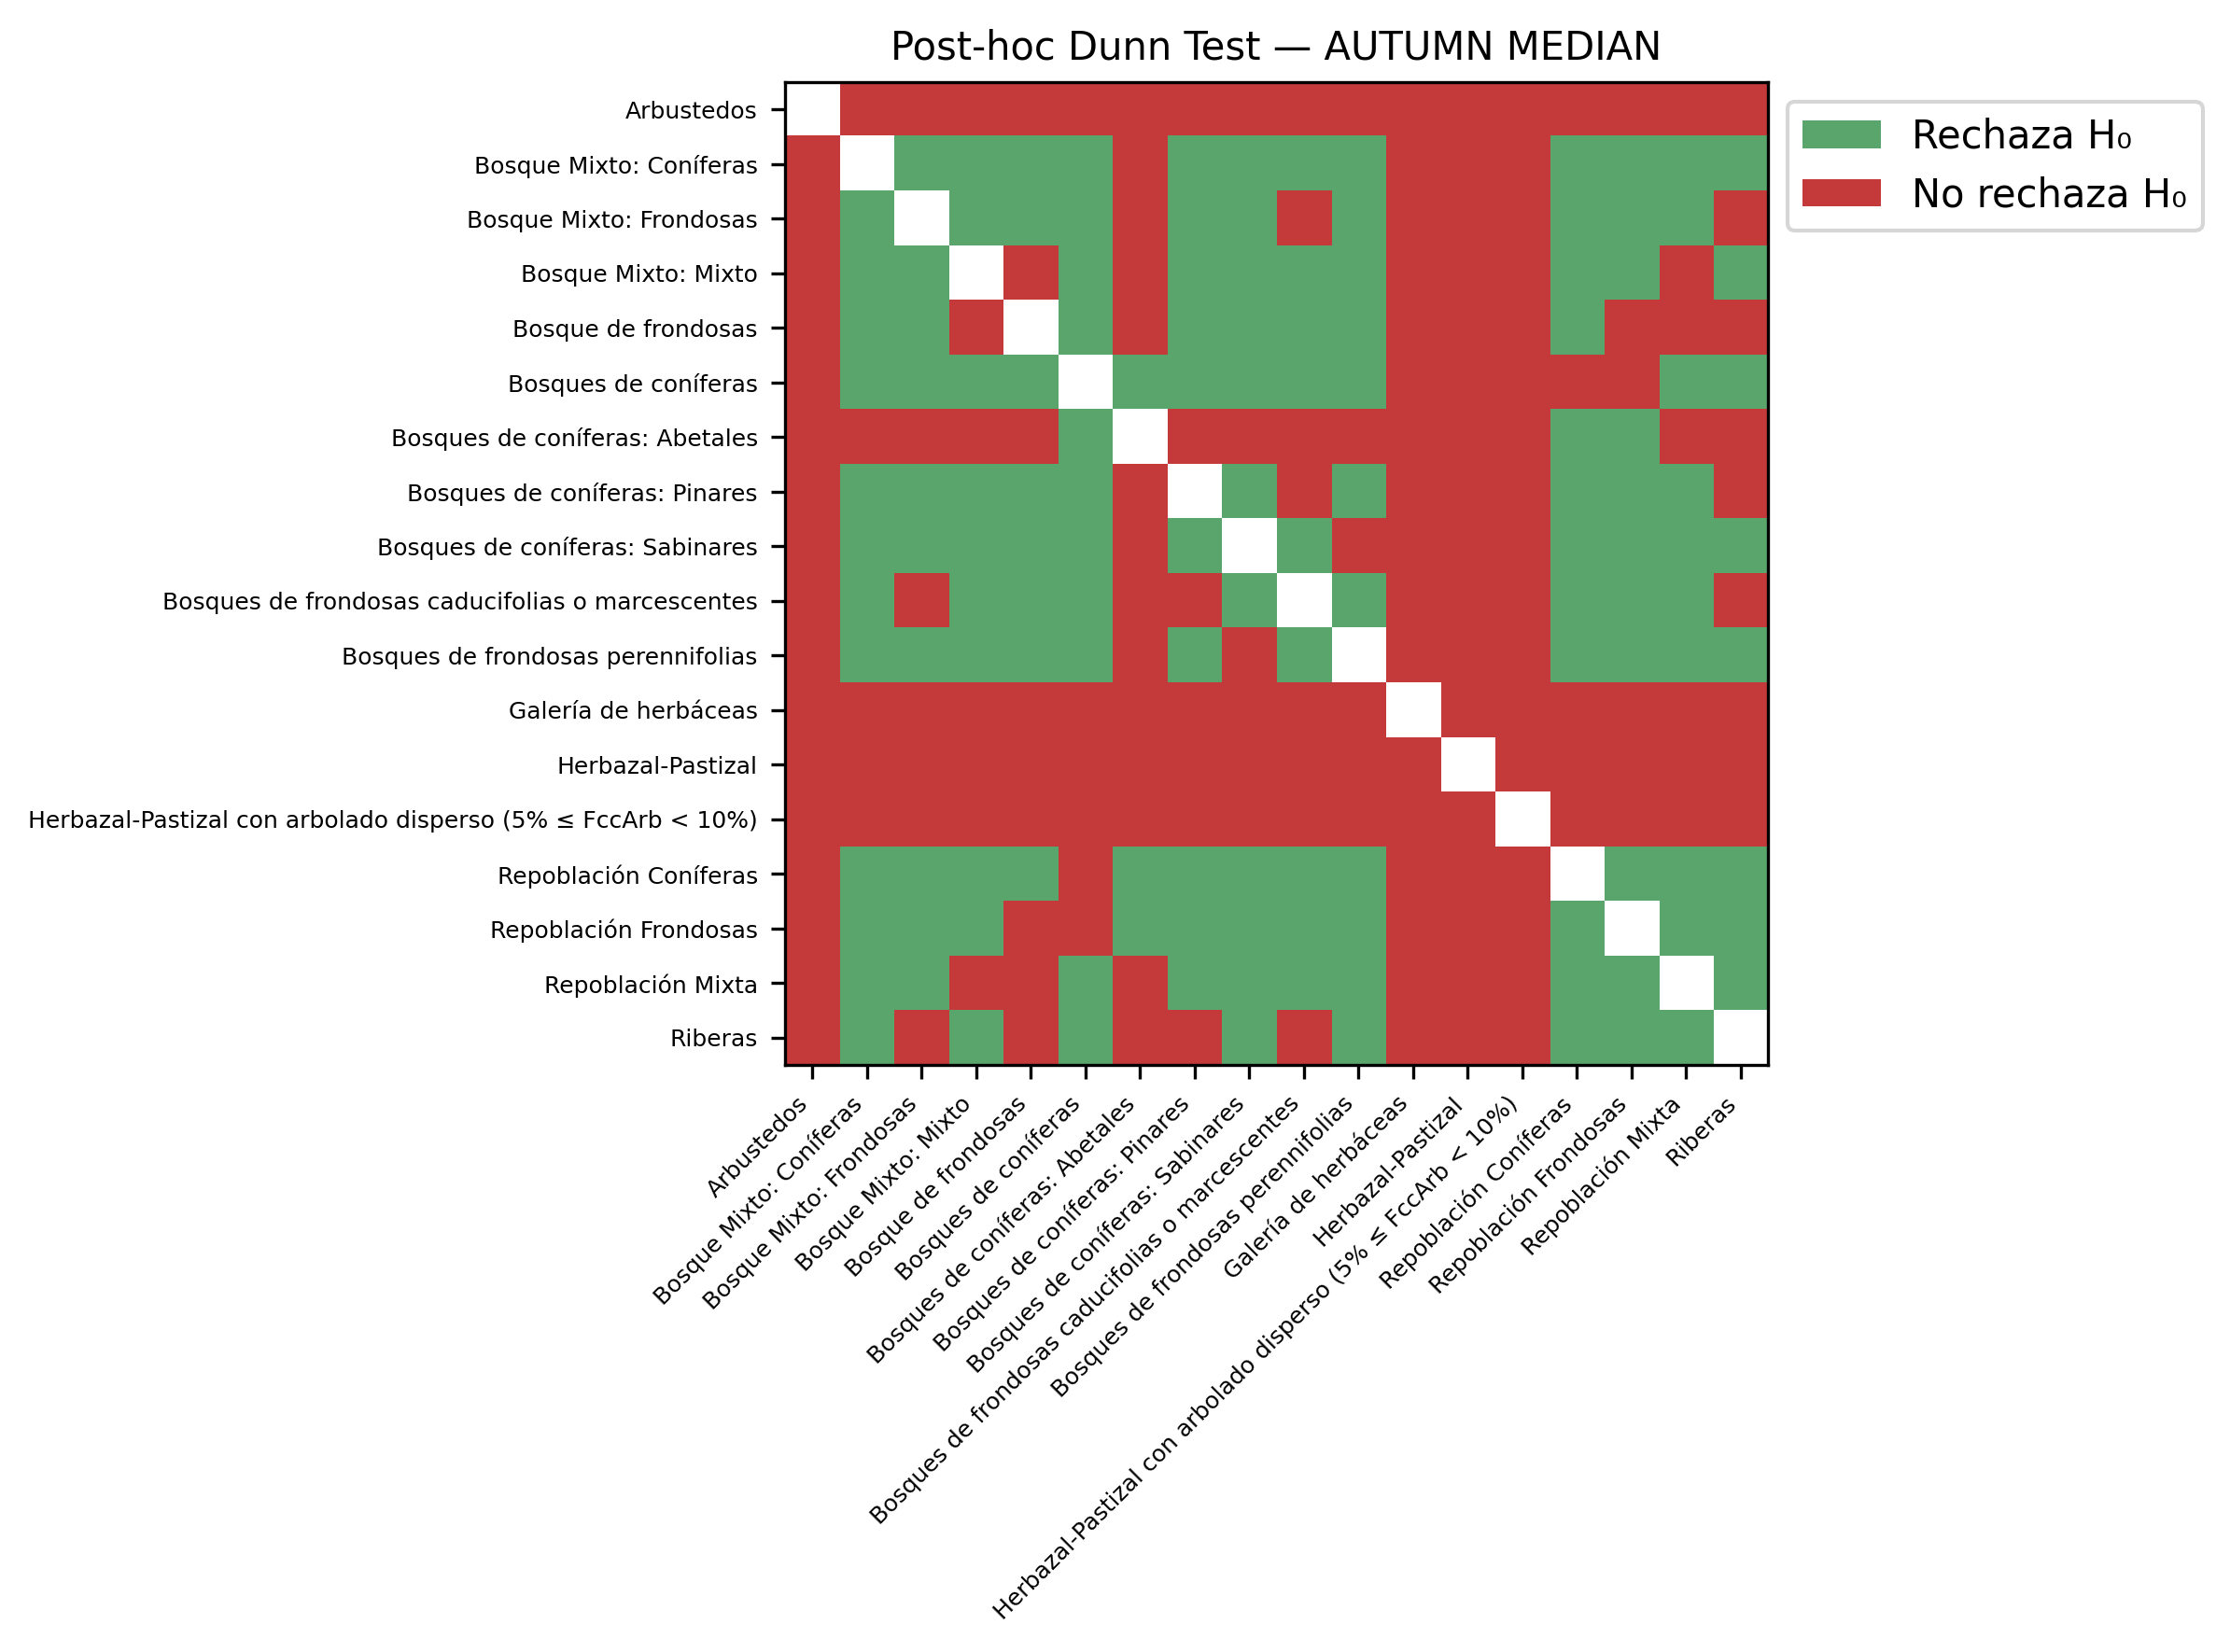

  Variable (Estación)      ANOVA_F  ANOVA_p     Kruskal_H  Kruskal_p
0       MEDIAN_winter  1402.035429      0.0  21663.277733        0.0
1       MEDIAN_spring  1055.801669      0.0  15578.894936        0.0
2       MEDIAN_summer   632.885691      0.0  10571.154684        0.0
3       MEDIAN_autumn  1155.236464      0.0  17759.421246        0.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
# --- Leer datos ---
df = pd.read_csv(r"E:\inSAR_GZ\stats\stats_FF21_mather_pure_stats_40_median.csv")

# Diccionario que mapea cada código ID_FORARB a su descripción en español
mapping_ID_FORARB = {
    "TM10": "Bosques de frondosas caducifolias o marcescentes",
    "TM16": "Bosques de frondosas perennifolias",
    "TM18": "Bosques de coníferas: Abetales",
    "TM22": "Bosques de coníferas: Sabinares",
    "TM29": "Bosques de coníferas: Pinares",
    "TM30": "Bosque de frondosas",
    "TM31": "Bosques de coníferas",
    "TM47": "Bosque Mixto: Frondosas",
    "TM48": "Bosque Mixto: Coníferas",
    "TM49": "Bosque Mixto: Mixto",
    "TM50": "Riberas",
    "TM51": "Dehesas",
    "TM52": "Arbolado disperso: Coníferas",
    "TM53": "Arbolado disperso: Frondosas",
    "TM54": "Arbolado disperso: Mixto",
    "TM57": "Repoblación Coníferas",
    "TM60": "Repoblación Frondosas",
    "TM61": "Repoblación Mixta",
    "TM62": "Sin clasificar",
    "TM63": None,
    "MA21": "Arbustedos", 
    "MA22": "Galerías Arbustivas",
    "MA23": "Pastizal-matorral",
    "MA24": "Mosaico de matorral con pastizal",
    "MA25": "Mosaico  de matorral con cultivo y/o prado (FccMato ≥ 50%)",
    "MA26": "Mosaico  o mezcla de matorral y/o pastizal con suelo desnudo",
    "MA27": "Superfie Forestal Residual (< 6ha)",
    "MA28": "Matorral con arbolado disperso  (5% ≤ FccArb < 10%)",
    "MA29": "Matorral con dehesa hueca (5% ≤ FccArb < 10%)",
    "PS31": "Herbazal-Pastizal",
    "PS32": "Mosaico de pastizal con Cultivo y/o prado  (FccHerbazal ≥ 50%)",
    "PS33": "Galería de herbáceas",
    "PS34": "Herbazal-Pastizal con arbolado disperso (5% ≤ FccArb < 10%)",
    "PS35": "Pastizal con dehesa hueca (5% ≤ FccArb < 10%)",
    "PS36": "Superfície de herbazal residual"}

df["ID_FORARB"] = df["ID_FORARB"].map(mapping_ID_FORARB)

columns_estaciones = ["MEDIAN_winter", "MEDIAN_spring", "MEDIAN_summer", "MEDIAN_autumn"]
resultados_totales = []

for col in columns_estaciones:
    df_filtrado = df.dropna(subset=[col, "ID_FORARB"])
    grupos = sorted(df_filtrado["ID_FORARB"].unique())
    if len(grupos) < 2:
        continue

    # ANOVA + Tukey
    modelo = smf.ols(f"{col} ~ C(ID_FORARB)", data=df_filtrado).fit()
    anova_table = sm.stats.anova_lm(modelo, typ=2)
    F_anova = anova_table["F"].iloc[0]
    p_anova = anova_table["PR(>F)"].iloc[0]

    if p_anova < 0.05:
        tukey = pairwise_tukeyhsd(df_filtrado[col], df_filtrado["ID_FORARB"], alpha=0.05)
        df_tukey = pd.DataFrame(tukey._results_table.data[1:], columns=tukey._results_table.data[0])

        sig_tukey = pd.DataFrame(np.nan, index=grupos, columns=grupos)
        for _, r in df_tukey.iterrows():
            val = 1 if r["reject"] else 0
            sig_tukey.loc[r["group1"], r["group2"]] = val
            sig_tukey.loc[r["group2"], r["group1"]] = val
        sig_tukey = sig_tukey.astype(float)
        np.fill_diagonal(sig_tukey.values, np.nan)

        # Usamos un colormap cualitativo de 2 categorías
        # Colormap de 2 categorías
        cmap = ListedColormap(['#c43a3a', '#5aa56b'])

        # --- Heatmap Tukey ---
        plt.figure(figsize=(10, 6), dpi=300)
        plt.imshow(sig_tukey, cmap=cmap, vmin=0, vmax=1)
        plt.xticks(range(len(grupos)), grupos, rotation=45, ha='right', fontsize=6)
        plt.yticks(range(len(grupos)), grupos, fontsize=6)
        plt.title(f"Post‑hoc Tukey HSD — {col.split('_')[1].upper()} {col.split('_')[0].upper()}", fontsize=10)

        legend_elements = [
            Patch(facecolor='#5aa56b', label='Rechaza H₀'),
            Patch(facecolor='#c43a3a',   label='No rechaza H₀')
        ]
        plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

        plt.tight_layout()
        plt.savefig(f"Heatmap_Tukey_{col}_vc.png", dpi=300, bbox_inches='tight')
        plt.show()

    # Kruskal-Wallis + Dunn
    listas = [df_filtrado[df_filtrado["ID_FORARB"] == g][col].values for g in grupos]
    H_kruskal, p_kruskal = kruskal(*listas)

    if p_kruskal < 0.05:
        dunn = sp.posthoc_dunn(df_filtrado, val_col=col, group_col="ID_FORARB", p_adjust="bonferroni")
        binary_dunn = dunn.map(lambda x: 1 if x < 0.05 else 0).astype(float)
        np.fill_diagonal(binary_dunn.values, np.nan)
        # --- Heatmap Dunn ---
        plt.figure(figsize=(10, 6), dpi=300)
        plt.imshow(binary_dunn, cmap=cmap, vmin=0, vmax=1)
        plt.xticks(range(len(grupos)), grupos, rotation=45, ha='right', fontsize=6)
        plt.yticks(range(len(grupos)), grupos, fontsize=6)
        plt.title(f"Post‑hoc Dunn Test — {col.split('_')[1].upper()} {col.split('_')[0].upper()}", fontsize=10)

        plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

        plt.tight_layout()
        plt.savefig(f"Heatmap_Dunn_{col}_vc.png", dpi=300, bbox_inches='tight')
        plt.show()


    resultados_totales.append({
        "Variable (Estación)": col,
        "ANOVA_F": F_anova,
        "ANOVA_p": p_anova,
        "Kruskal_H": H_kruskal,
        "Kruskal_p": p_kruskal
    })

df_resumen = pd.DataFrame(resultados_totales)
print(df_resumen)


In [7]:
# --- Después de tu bucle principal, al final del script ---

# Inicializa un DataFrame de resumen:
# Filas = formaciones, columnas = estaciones
resumen = pd.DataFrame(
    False,
    index=sorted(df["ID_FORARB"].dropna().unique()),
    columns=columns_estaciones
)

for col in columns_estaciones:
    df_filtrado = df.dropna(subset=[col, "ID_FORARB"])
    grupos = sorted(df_filtrado["ID_FORARB"].unique())
    if len(grupos) < 2:
        continue

    # ANOVA + Tukey
    modelo = smf.ols(f"{col} ~ C(ID_FORARB)", data=df_filtrado).fit()
    p_anova = sm.stats.anova_lm(modelo, typ=2)["PR(>F)"].iloc[0]

    if p_anova < 0.05:
        tukey = pairwise_tukeyhsd(df_filtrado[col], df_filtrado["ID_FORARB"], alpha=0.05)
        df_tukey = pd.DataFrame(tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        # matriz binaria de significación
        sig_tukey = pd.DataFrame(
            np.nan, index=grupos, columns=grupos
        )
        for _, r in df_tukey.iterrows():
            sig = 1 if r["reject"] else 0
            sig_tukey.loc[r["group1"], r["group2"]] = sig
            sig_tukey.loc[r["group2"], r["group1"]] = sig
        # Si una formación tiene al menos un "1" en su fila,
        # marcamos que en esta estación difiere
        for form in grupos:
            if sig_tukey.loc[form].eq(1).any():
                resumen.at[form, col] = True

    # Kruskal-Wallis + Dunn (opcional, mismo procedimiento si quieres combinar ambos tests)
    H_kruskal, p_kruskal = kruskal(
        *[df_filtrado[df_filtrado["ID_FORARB"] == g][col].values
          for g in grupos]
    )
    if p_kruskal < 0.05:
        dunn = sp.posthoc_dunn(df_filtrado, val_col=col, group_col="ID_FORARB", p_adjust="bonferroni")
        # binarizamos
        binary_dunn = dunn.map(lambda p: 1 if p < 0.05 else 0)
        for form in grupos:
            if binary_dunn.loc[form].eq(1).any():
                resumen.at[form, col] = True

# Imprimimos el resumen
print("¿Cada formación difiere en cada estación?\n")
print(resumen.astype(int))  # 1 = sí difiere, 0 = no difiere

# Y filtramos las que difieren en todas las estaciones
todas = resumen.all(axis=1)
print("\nFormaciones con diferencias en las cuatro estaciones:")
print(todas[todas].index.tolist())


¿Cada formación difiere en cada estación?

                                                    MEDIAN_winter  \
Arbustedos                                                      0   
Bosque Mixto: Coníferas                                         1   
Bosque Mixto: Frondosas                                         1   
Bosque Mixto: Mixto                                             1   
Bosque de frondosas                                             1   
Bosques de coníferas                                            1   
Bosques de coníferas: Abetales                                  1   
Bosques de coníferas: Pinares                                   1   
Bosques de coníferas: Sabinares                                 1   
Bosques de frondosas caducifolias o marcescentes                1   
Bosques de frondosas perennifolias                              1   
Galería de herbáceas                                            0   
Herbazal-Pastizal                                           

In [9]:
# --- Resumen por formación y número de estaciones ---
# Inicializamos el DataFrame de resumen
formaciones = sorted(df["ID_FORARB"].dropna().unique())
resumen = pd.DataFrame(
    0,
    index=formaciones,
    columns=columns_estaciones + ["N_estaciones_dif"]
)

for col in columns_estaciones:
    df_filtrado = df.dropna(subset=[col, "ID_FORARB"])
    grupos = sorted(df_filtrado["ID_FORARB"].unique())
    if len(grupos) < 2:
        continue

    # ANOVA + Tukey
    modelo = smf.ols(f"{col} ~ C(ID_FORARB)", data=df_filtrado).fit()
    if sm.stats.anova_lm(modelo, typ=2)["PR(>F)"].iloc[0] < 0.05:
        tukey = pairwise_tukeyhsd(df_filtrado[col], df_filtrado["ID_FORARB"], alpha=0.05)
        df_tukey = pd.DataFrame(tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        # Marcamos 1 si esa formación se diferencia de al menos otra
        for form in grupos:
            if ((df_tukey.query("group1 == @form")["reject"].any()) or
                (df_tukey.query("group2 == @form")["reject"].any())):
                resumen.at[form, col] = 1

    # Kruskal-Wallis + Dunn (opcional combinar ambos criterios)
    H, p = kruskal(*(df_filtrado[df_filtrado["ID_FORARB"] == g][col].values for g in grupos))
    if p < 0.05:
        dunn = sp.posthoc_dunn(df_filtrado, val_col=col, group_col="ID_FORARB", p_adjust="bonferroni")
        binary = dunn.map(lambda pval: 1 if pval < 0.05 else 0)
        for form in grupos:
            if binary.loc[form].any():
                resumen.at[form, col] = 1

# Contamos cuántas estaciones tiene cada formación con diferencias
resumen["N_estaciones_dif"] = resumen[columns_estaciones].sum(axis=1)

# Mostramos el resultado
print(resumen.sort_values("N_estaciones_dif", ascending=False))


C:\Users\GeoQuBiDy\AppData\Local\Temp\ipykernel_15844\823394619.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary = dunn.applymap(lambda pval: 1 if pval < 0.05 else 0)
C:\Users\GeoQuBiDy\AppData\Local\Temp\ipykernel_15844\823394619.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary = dunn.applymap(lambda pval: 1 if pval < 0.05 else 0)
C:\Users\GeoQuBiDy\AppData\Local\Temp\ipykernel_15844\823394619.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary = dunn.applymap(lambda pval: 1 if pval < 0.05 else 0)


                                                    MEDIAN_winter  \
Bosque Mixto: Coníferas                                         1   
Bosque Mixto: Frondosas                                         1   
Bosques de frondosas perennifolias                              1   
Bosque Mixto: Mixto                                             1   
Bosque de frondosas                                             1   
Bosques de coníferas                                            1   
Bosques de coníferas: Abetales                                  1   
Bosques de coníferas: Pinares                                   1   
Bosques de coníferas: Sabinares                                 1   
Bosques de frondosas caducifolias o marcescentes                1   
Riberas                                                         1   
Repoblación Mixta                                               1   
Repoblación Frondosas                                           1   
Repoblación Coníferas             

C:\Users\GeoQuBiDy\AppData\Local\Temp\ipykernel_15844\823394619.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary = dunn.applymap(lambda pval: 1 if pval < 0.05 else 0)


In [ ]:
import itertools

# Prepara un diccionario para ir guardando los resultados:
# clave: (form1, form2), valor: dict estación → 1/0
pares = {}

# Lista ordenada de formaciones
formaciones = sorted(df["ID_FORARB"].dropna().unique())

# Inicializa todos los pares
for f1, f2 in itertools.combinations(formaciones, 2):
    pares[(f1, f2)] = {est: 0 for est in columns_estaciones}

for col in columns_estaciones:
    df_filtrado = df.dropna(subset=[col, "ID_FORARB"])
    grupos = sorted(df_filtrado["ID_FORARB"].unique())
    if len(grupos) < 2:
        continue

    # ANOVA + Tukey
    modelo = smf.ols(f"{col} ~ C(ID_FORARB)", data=df_filtrado).fit()
    if sm.stats.anova_lm(modelo, typ=2)["PR(>F)"].iloc[0] < 0.05:
        tukey = pairwise_tukeyhsd(df_filtrado[col], df_filtrado["ID_FORARB"], alpha=0.05)
        df_tukey = pd.DataFrame(tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        # Marca los pares que rechazan H0
        for _, r in df_tukey.iterrows():
            if r["reject"]:
                key = tuple(sorted((r["group1"], r["group2"])))
                pares[key][col] = 1

    # Kruskal-Wallis + Dunn (opcional, si quieres incluirlo)
    H, p = kruskal(*(df_filtrado[df_filtrado["ID_FORARB"] == g][col].values for g in grupos))
    if p < 0.05:
        dunn = sp.posthoc_dunn(df_filtrado, val_col=col, group_col="ID_FORARB", p_adjust="bonferroni")
        binary = dunn.map(lambda pval: 1 if pval < 0.05 else 0)
        for f1, f2 in itertools.combinations(grupos, 2):
            if binary.loc[f1, f2] == 1 or binary.loc[f2, f1] == 1:
                key = tuple(sorted((f1, f2)))
                pares[key][col] = 1

# Convierte el diccionario en DataFrame
df_pares = (
    pd.DataFrame.from_dict(pares, orient='index')
      .reset_index()
      .rename(columns={
          'level_0': 'Formación 1',
          'level_1': 'Formación 2',
          **{est: est.replace("MEDIAN_", "") for est in columns_estaciones}
      })
)

# (Opcional) Cuenta en cuántas estaciones se diferencian
df_pares['N_estaciones_dif'] = df_pares[columns_estaciones].sum(axis=1)

# Exporta a CSV
df_pares.to_csv("pares_formaciones_significativas.csv", index=False)

print("CSV generado: pares_formaciones_significativas.csv")


C:\Users\GeoQuBiDy\AppData\Local\Temp\ipykernel_15844\1205252468.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary = dunn.applymap(lambda pval: 1 if pval < 0.05 else 0)
C:\Users\GeoQuBiDy\AppData\Local\Temp\ipykernel_15844\1205252468.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary = dunn.applymap(lambda pval: 1 if pval < 0.05 else 0)
C:\Users\GeoQuBiDy\AppData\Local\Temp\ipykernel_15844\1205252468.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary = dunn.applymap(lambda pval: 1 if pval < 0.05 else 0)
C:\Users\GeoQuBiDy\AppData\Local\Temp\ipykernel_15844\1205252468.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary = dunn.applymap(lambda pval: 1 if pval < 0.05 else 0)


KeyError: "None of [Index(['MEDIAN_winter', 'MEDIAN_spring', 'MEDIAN_summer', 'MEDIAN_autumn'], dtype='object')] are in the [columns]"

In [14]:
import itertools

# Prepara un diccionario para ir guardando los resultados:
# clave: (form1, form2), valor: dict estación → 1/0
pares = {}

# Lista ordenada de formaciones
formaciones = sorted(df["ID_FORARB"].dropna().unique())

# Inicializa todos los pares
for f1, f2 in itertools.combinations(formaciones, 2):
    pares[(f1, f2)] = {est: 0 for est in columns_estaciones}

for col in columns_estaciones:
    df_filtrado = df.dropna(subset=[col, "ID_FORARB"])
    grupos = sorted(df_filtrado["ID_FORARB"].unique())
    if len(grupos) < 2:
        continue

    # ANOVA + Tukey
    modelo = smf.ols(f"{col} ~ C(ID_FORARB)", data=df_filtrado).fit()
    if sm.stats.anova_lm(modelo, typ=2)["PR(>F)"].iloc[0] < 0.05:
        tukey = pairwise_tukeyhsd(df_filtrado[col], df_filtrado["ID_FORARB"], alpha=0.05)
        df_tukey = pd.DataFrame(tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        # Marca los pares que rechazan H0
        for _, r in df_tukey.iterrows():
            if r["reject"]:
                key = tuple(sorted((r["group1"], r["group2"])))
                pares[key][col] = 1

    # Kruskal-Wallis + Dunn (opcional, si quieres incluirlo)
    H, p = kruskal(*(df_filtrado[df_filtrado["ID_FORARB"] == g][col].values for g in grupos))
    if p < 0.05:
        dunn = sp.posthoc_dunn(df_filtrado, val_col=col, group_col="ID_FORARB", p_adjust="bonferroni")
        binary = dunn.map(lambda pval: 1 if pval < 0.05 else 0)
        for f1, f2 in itertools.combinations(grupos, 2):
            if binary.loc[f1, f2] == 1 or binary.loc[f2, f1] == 1:
                key = tuple(sorted((f1, f2)))
                pares[key][col] = 1

# Convierte el diccionario en DataFrame
df_pares = (
    pd.DataFrame.from_dict(pares, orient='index')
      .reset_index()
      .rename(columns={
          'level_0': 'Formación 1',
          'level_1': 'Formación 2',
        #   **{est: est.replace("MEDIAN_", "") for est in columns_estaciones}
      })
)
# print(df_pares.columns)
# (Opcional) Cuenta en cuántas estaciones se diferencian
df_pares['N_estaciones_dif'] = df_pares[columns_estaciones].sum(axis=1)

# Exporta a CSV
df_pares.to_csv("pares_formaciones_significativas.csv", index=False, encoding='utf-8')

print("CSV generado: pares_formaciones_significativas.csv")


CSV generado: pares_formaciones_significativas.csv


In [16]:
### exportar a excel
import pandas as pd
import openpyxl
import os

df_pares.to_excel(r"E:\inSAR_GZ\pares_formaciones_significativas.xlsx", index=False, engine='openpyxl')